# **Bank Marketing Effectiveness Prediction**

### **<u>Project Summary</u>**

This project focuses on utilizing machine learning techniques to predict the effectiveness of bank marketing campaigns. The data used in the project is provided by a Portuguese banking institution and includes input variables such as age, job, marital status, education, and balance etc.

The goal of this project is to develop a classification model that can accurately predict the effectiveness of bank marketing campaigns. Through the use of machine learning algorithms and techniques, the model will be able to classify a client's response to a campaign as either positive or negative. This project will provide insight into how different input variables can affect the effectiveness of bank marketing campaigns and help banks better target their customers.

### **<u>Problem Statement</u>**

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).

### **<u>Data Description</u>**

- age: age of client (numeric)
- job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- default: has credit in default? (categorical: 'no','yes','unknown')
- housing: has housing loan? (categorical: 'no','yes','unknown')
- loan: has personal loan? (categorical: 'no','yes','unknown')
- contact: contact communication type (categorical: 'cellular','telephone')
- month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- balance: Account balance of client
- day: last contact day of the month
- duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
- y (target Variable) - has the client subscribed a term deposit? (binary: 'yes','no')

.

In [69]:
## Importing necessary libraries
# For scientific computation and processing array elements.
import numpy as np
from scipy.stats import norm
# Importing pandas
import pandas as pd
# For plotting statstical visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# For plotting feature importance
from sklearn.feature_selection import mutual_info_classif

# For handling class imbalance
from imblearn.over_sampling import SMOTE

# For Split dataset into train and test
from sklearn.model_selection import train_test_split

# For Cross-Validation and Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# For Scaliing dataset
from sklearn.preprocessing import MinMaxScaler

# Importing algorithams for building model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
#To ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [70]:
# Loabding Dataset
df=pd.read_csv('bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [71]:
# Last five observations
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


.

### **Data Inispection**

In [72]:
# Checking shape of the dataset
df.shape

(11162, 17)

- Dataset having 45211 instances and 17 columns

In [73]:
# Checking columns name of dataset
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [74]:
# Basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


- In the dataset, there are object, float64, and int64 dtypes features present.

In [75]:
# Bsic description of Dataset
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
count,11162.000000,11162,11162,11162,11162,11162.000000,11162,11162,11162,11162.000000,11162,11162.000000,11162.000000,11162.000000,11162.000000,11162,11162
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,no,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,2566,6351,5476,10994,NaN,5881,9702,8042,NaN,2824,NaN,NaN,NaN,NaN,8326,5873
mean,41.231948,NaN,NaN,NaN,NaN,1528.538524,NaN,NaN,NaN,15.658036,NaN,371.993818,2.508421,51.330407,0.832557,NaN,NaN
std,11.913369,NaN,NaN,NaN,NaN,3225.413326,NaN,NaN,NaN,8.420740,NaN,347.128386,2.722077,108.758282,2.292007,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-6847.000000,NaN,NaN,NaN,1.000000,NaN,2.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,NaN,122.000000,NaN,NaN,NaN,8.000000,NaN,138.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,550.000000,NaN,NaN,NaN,15.000000,NaN,255.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1708.000000,NaN,NaN,NaN,22.000000,NaN,496.000000,3.000000,20.750000,1.000000,NaN,NaN


In [76]:
# Checking duplicated values in dataset
count_duplicated = df.duplicated().sum()
print(f'Dataset having {count_duplicated} duplicated values')

Dataset having 0 duplicated values


In [77]:
# Checking for number of null values in dataset
count_null_df=pd.DataFrame({'columns':df.columns,'number_of_nulls_values':df.isna().sum()})
count_null_df.set_index('columns').sort_values(by='number_of_nulls_values', ascending = False)

,number_of_nulls_values
columns,
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0


<b><u>Observations :</u></b>
- Dataset having 45211 instances/rows and 17 columns.
- In the dataset, there are object, float64, and int64 dtypes features present.
- Dataset having 0 duplicated values.
- There are no null/missing values in the dataset.

.

### **Understanding Variables**

In [78]:
# Basic description of Dataset
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
count,11162.000000,11162,11162,11162,11162,11162.000000,11162,11162,11162,11162.000000,11162,11162.000000,11162.000000,11162.000000,11162.000000,11162,11162
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,no,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,2566,6351,5476,10994,NaN,5881,9702,8042,NaN,2824,NaN,NaN,NaN,NaN,8326,5873
mean,41.231948,NaN,NaN,NaN,NaN,1528.538524,NaN,NaN,NaN,15.658036,NaN,371.993818,2.508421,51.330407,0.832557,NaN,NaN
std,11.913369,NaN,NaN,NaN,NaN,3225.413326,NaN,NaN,NaN,8.420740,NaN,347.128386,2.722077,108.758282,2.292007,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-6847.000000,NaN,NaN,NaN,1.000000,NaN,2.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,NaN,122.000000,NaN,NaN,NaN,8.000000,NaN,138.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,550.000000,NaN,NaN,NaN,15.000000,NaN,255.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1708.000000,NaN,NaN,NaN,22.000000,NaN,496.000000,3.000000,20.750000,1.000000,NaN,NaN


In [79]:
# Finding categorical variables
categorical_variables = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical_variables)))
print('--'*45)
print(categorical_variables)

There are 10 categorical variables
------------------------------------------------------------------------------------------
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']


In [80]:
# Finding numerical variables
numerical_variables=[var for var in df.columns if var not in categorical_variables]
print('There are {} numerical variables'.format(len(numerical_variables)))
print('--'*45)
print(numerical_variables)

There are 7 numerical variables
------------------------------------------------------------------------------------------
['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [81]:
# Check Unique Values and its frequency for each variable
for var in df.columns:
    print(df[var].value_counts())
    print('**'*45)

age
31    496
32    477
34    466
33    464
35    461
     ... 
92      2
88      2
93      2
95      1
89      1
Name: count, Length: 76, dtype: int64
******************************************************************************************
job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64
******************************************************************************************
marital
married     6351
single      3518
divorced    1293
Name: count, dtype: int64
******************************************************************************************
education
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: count, dtype: int64
****************************************************************************************

Observations
- job, marital, education, default, housing, loan, contact, month, poutcome, and y are among the 10 categorical variables in this dataset.
- There are 7 numerical variables in this dataset: age, balance, day, duration, campaign, pdays, and previous.
- Some features in the dataset have unknown values so we will hendal that later

.

### **Data Wrangling and Feature Engineering**

In [82]:
# Checking duplicated values in dataset
count_duplicated = df.duplicated().sum()
print(f'Dataset having {count_duplicated} duplicated values')

Dataset having 0 duplicated values


In [83]:
# Replacing the unknown values with null across all the dataset
df = df.replace('unknown', np.nan)

In [84]:
# Checking for number of null values
count_null_df=pd.DataFrame({'columns':df.columns,'number_of_nulls_values':df.isna().sum(),'percentage_null_values':round(df.isna().sum()*100/len(df),2)})
count_null_df.set_index('columns').sort_values(by='percentage_null_values', ascending = False)

,number_of_nulls_values,percentage_null_values
columns,,
poutcome,8326,74.59
contact,2346,21.02
education,497,4.45
job,70,0.63
age,0,0.00
default,0,0.00
balance,0,0.00
housing,0,0.00
marital,0,0.00


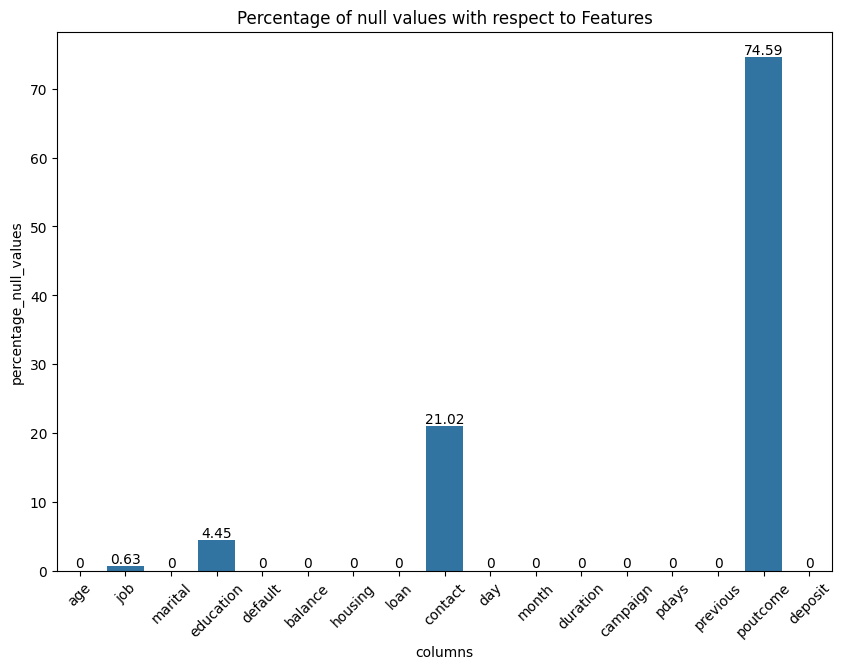

In [85]:
# Ploting number of null values with its variable
plt.figure(figsize=(10,7))
ax=sns.barplot(x='columns', y='percentage_null_values', data=count_null_df)
ax.bar_label(ax.containers[0])
plt.title('Percentage of null values with respect to Features')
plt.xticks(rotation= 45)
plt.show()

- The null values for poutcome, contact, education, and job are 81.75%, 28.80%, 4.11%, and 0.64%, respectively. 

Text(0.5, 1.0, 'Missing values in the dataset with respect to its features')

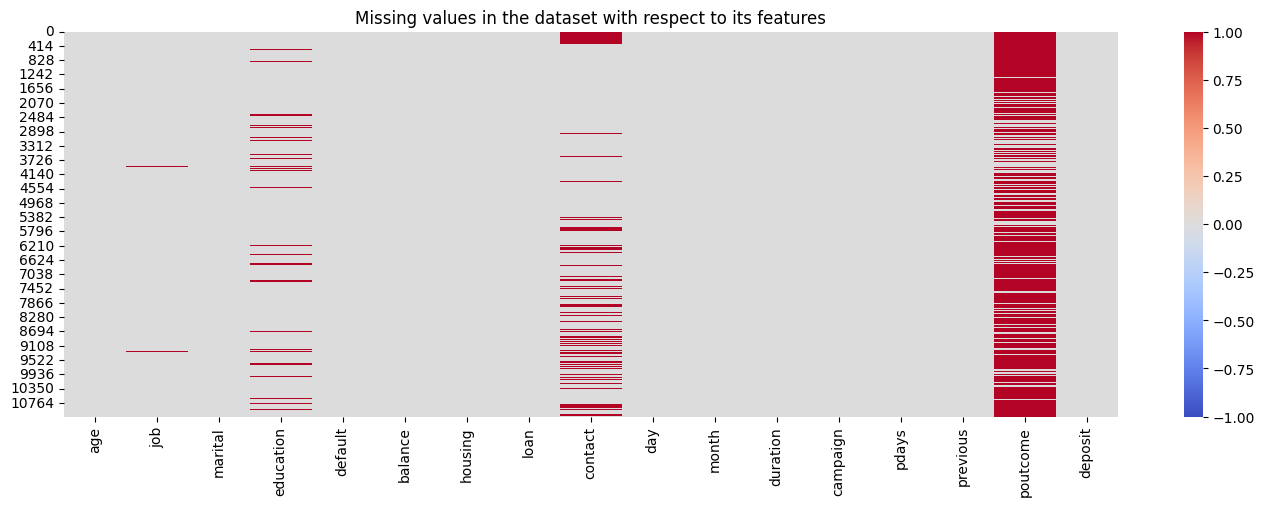

In [86]:
# Vizualizing the null values from the dataset
plt.figure(figsize=(17,5))
sns.heatmap(df.isnull(),cbar=True,vmin=-1, cmap='coolwarm')
plt.title('Missing values in the dataset with respect to its features')

In [87]:
#checking category of features whoes having null values

# Defining target variables
null_variables=['poutcome','contact','education','job']
# Checking categories in each target feature
for var in null_variables:
    print(df[var].value_counts())
    print('**'*45)

poutcome
failure    1228
success    1071
other       537
Name: count, dtype: int64
******************************************************************************************
contact
cellular     8042
telephone     774
Name: count, dtype: int64
******************************************************************************************
education
secondary    5476
tertiary     3689
primary      1500
Name: count, dtype: int64
******************************************************************************************
job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
Name: count, dtype: int64
******************************************************************************************


In [88]:
# Dropping variables having more than 50% null values
df.drop(columns='poutcome', inplace=True)

# Replacing null values with the most frequent value in a variable
df['contact']=df['contact'].fillna(df['contact'].mode()[0])
df['education']=df['education'].fillna(df['education'].mode()[0])
df['job']=df['job'].fillna(df['job'].mode()[0])

In [89]:
# Verify for null values are removed
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
deposit      0
dtype: int64

In [90]:
# Nullfree shape of dataset
df.shape

(11162, 16)

- Replaced null values for features like contact, education, and job with their modes. In addition, removed features with more than 50% null values because they were worthless and hindered model performance.

#### **Handling Outliers**

__________________________________________________________________________________________


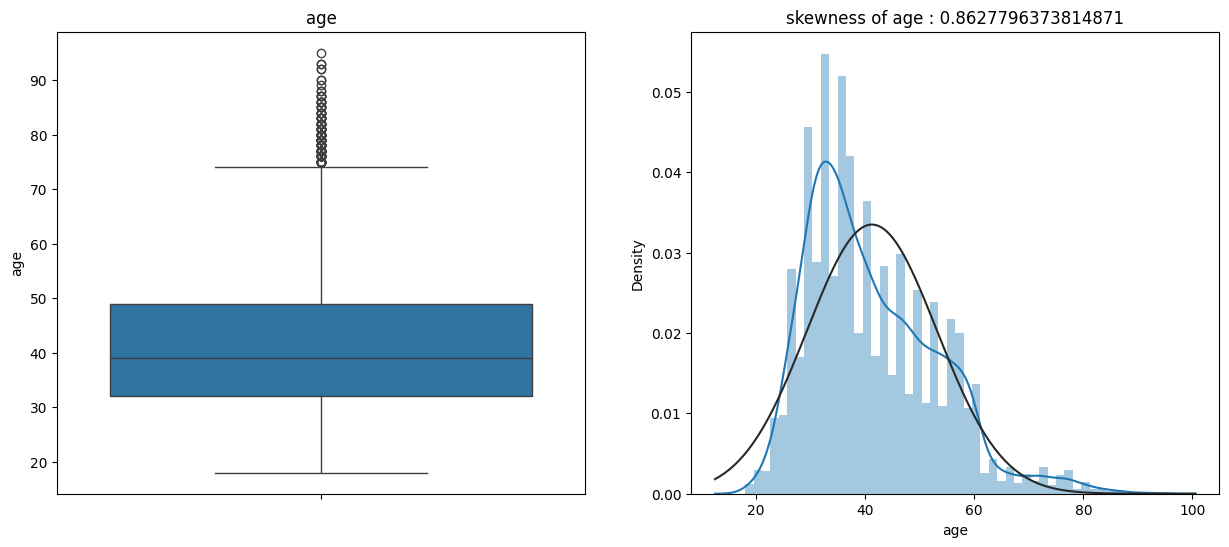

__________________________________________________________________________________________


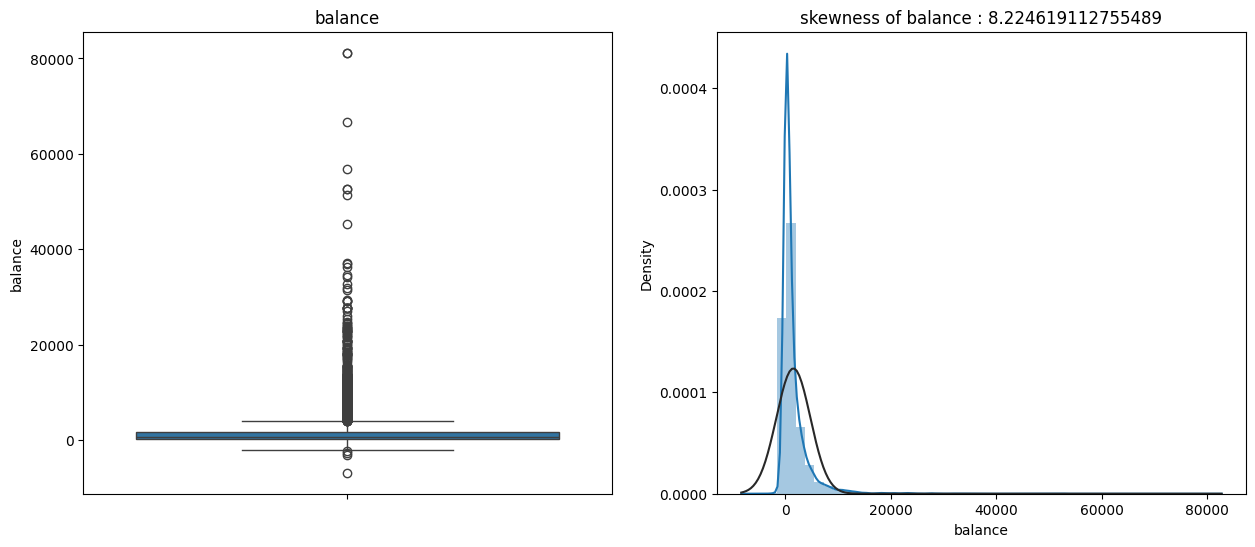

__________________________________________________________________________________________


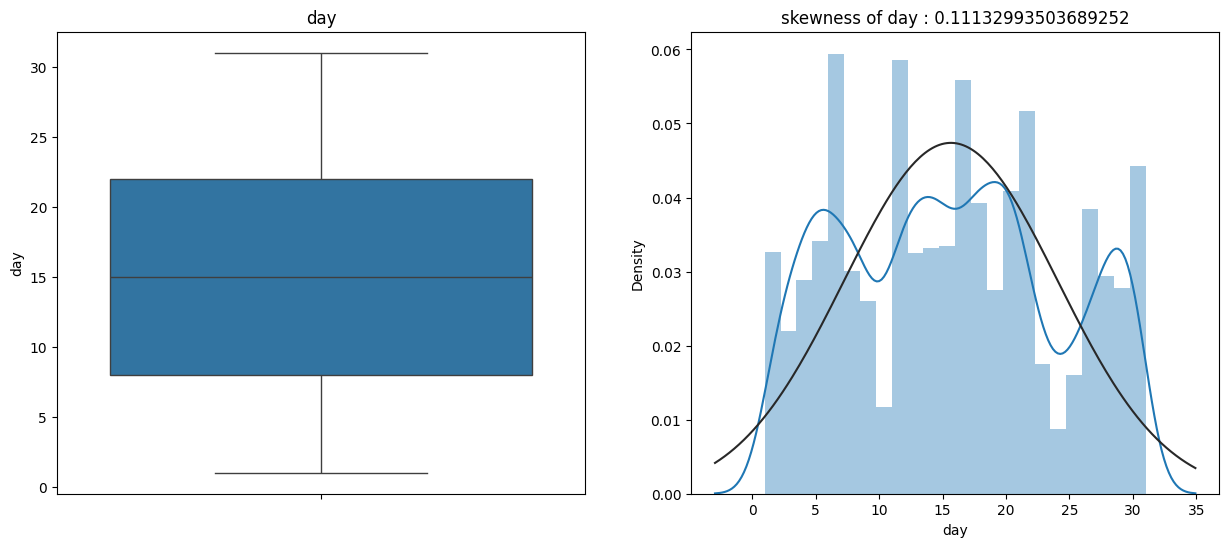

__________________________________________________________________________________________


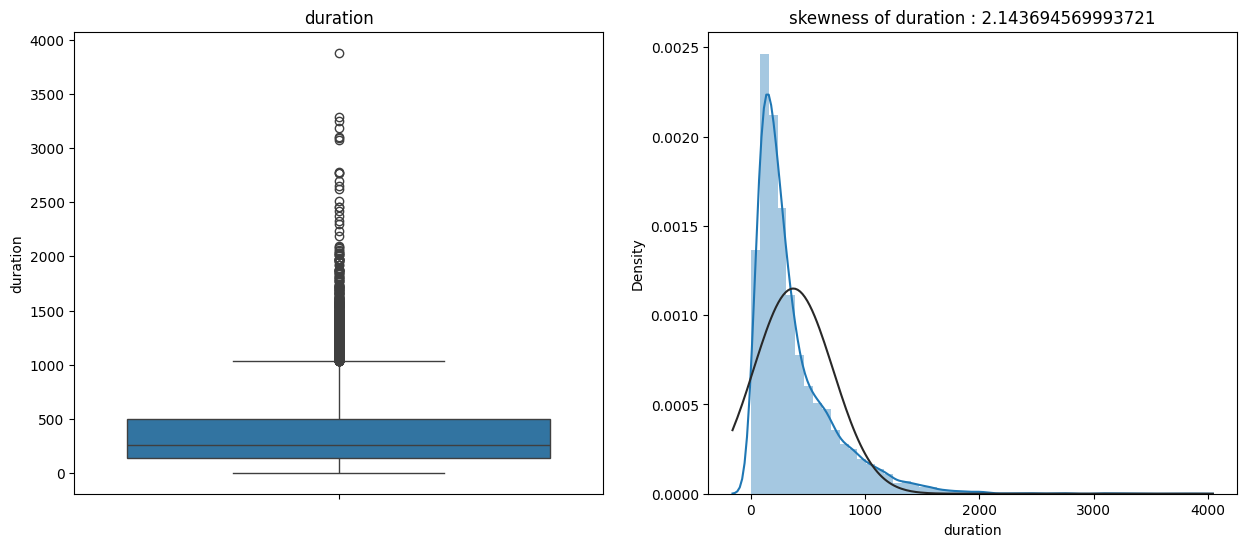

__________________________________________________________________________________________


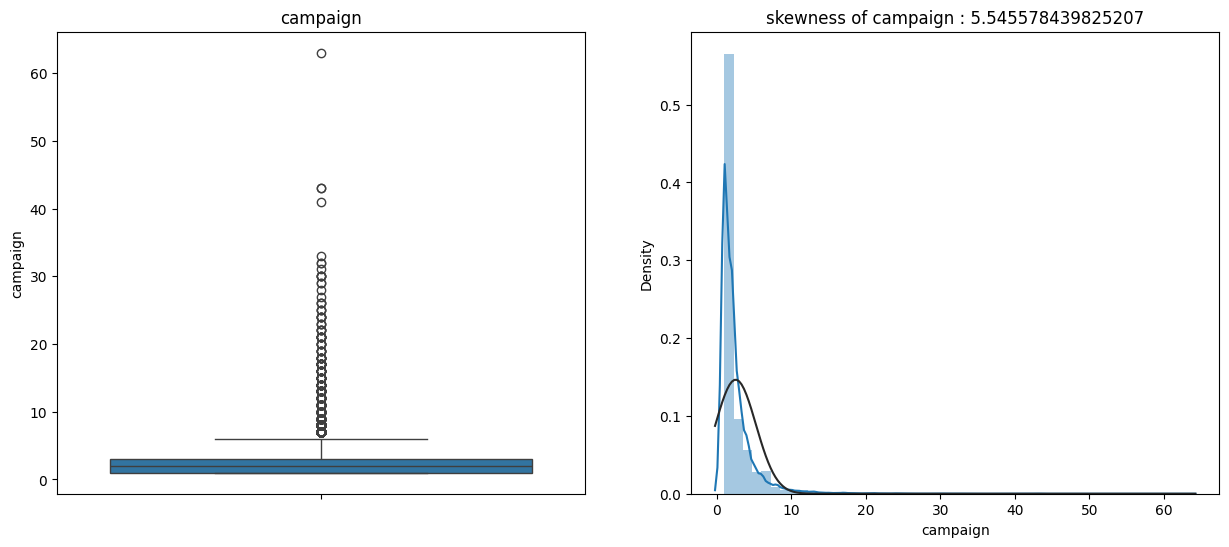

__________________________________________________________________________________________


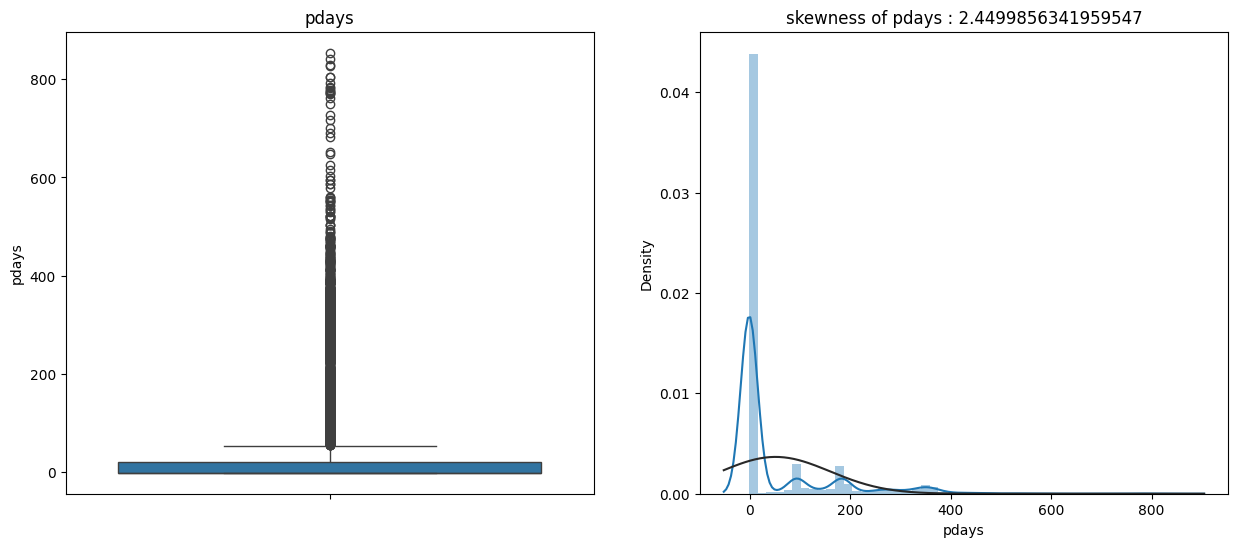

__________________________________________________________________________________________


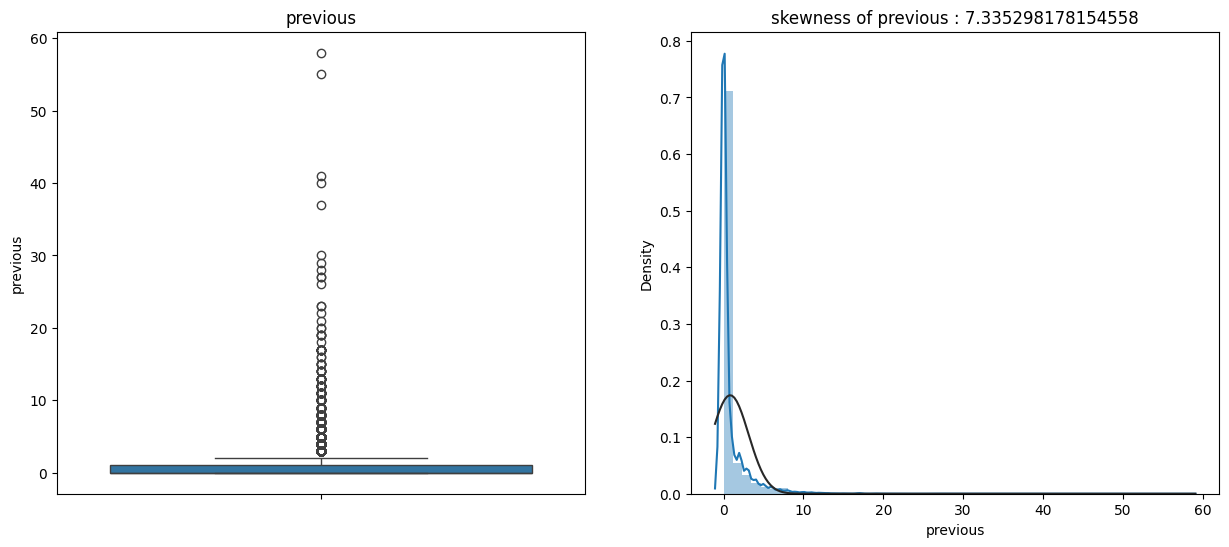

In [91]:
# Checking for outliers in numerical variables using boxplot
from scipy.stats import norm

# Plotting Box and Distribution plot using for loop
for var in numerical_variables:
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    ax=sns.boxplot(data=df[var])
    ax.set_title(f'{var}')
    ax.set_ylabel(var)

    plt.subplot(1,2,2)
    ax=sns.distplot(df[var], fit=norm)
    ax.set_title(f'skewness of {var} : {df[var].skew()}')
    ax.set_xlabel(var)
    print('__'*45)
    plt.show()

- The variables age, balance, duration, campaign, pdays, and previous contain outliers. pdays, and previous have a flat interquartile range; it is best to remove those columns.
- Variable day does not have any outliers.

In [92]:
# Using Inter Quartile Range for removing outliers from numerical variables

# Defining outlier features but remove flat IQR feature pdays and previous
outlier_var=['age', 'balance', 'duration', 'campaign']

# Capping dataset
for i in outlier_var:
    # Findling IQR
    Q1=df[i].quantile(0.25)
    Q3=df[i].quantile(0.75)
    IQR=Q3-Q1
    
    # Defining upper and lower limit
    lower_limit =df[i].quantile(0.25)-1.5*IQR
    upper_limit =df[i].quantile(0.75)+1.5*IQR
    
    # Applying lower and upper limit to each variables
    df.loc[(df[i] > upper_limit),i] = upper_limit
    df.loc[(df[i] < lower_limit),i] = lower_limit

__________________________________________________________________________________________


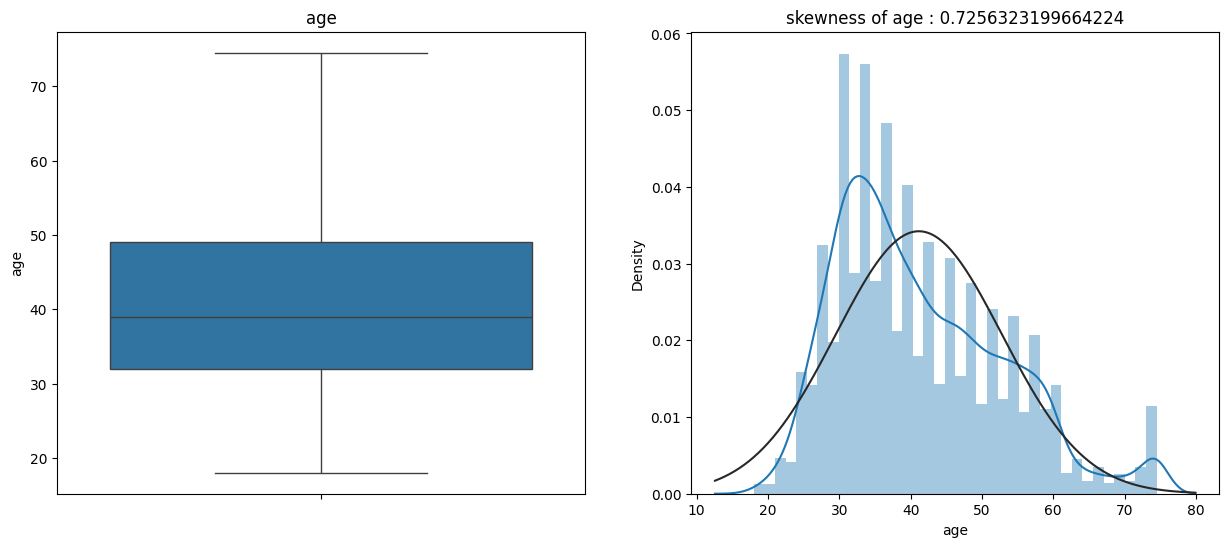

__________________________________________________________________________________________


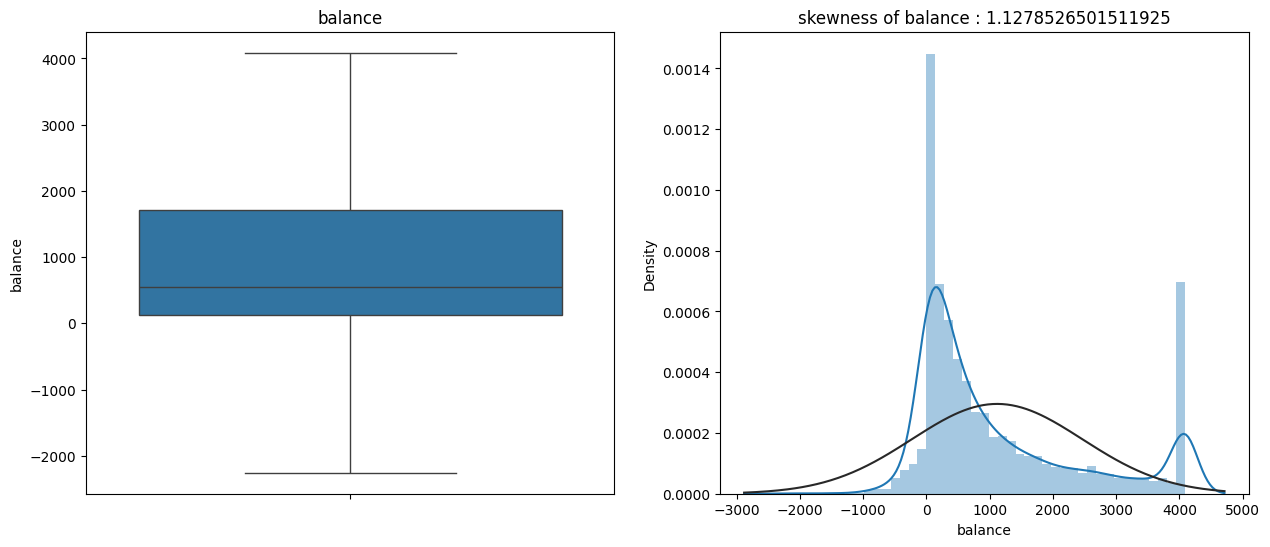

__________________________________________________________________________________________


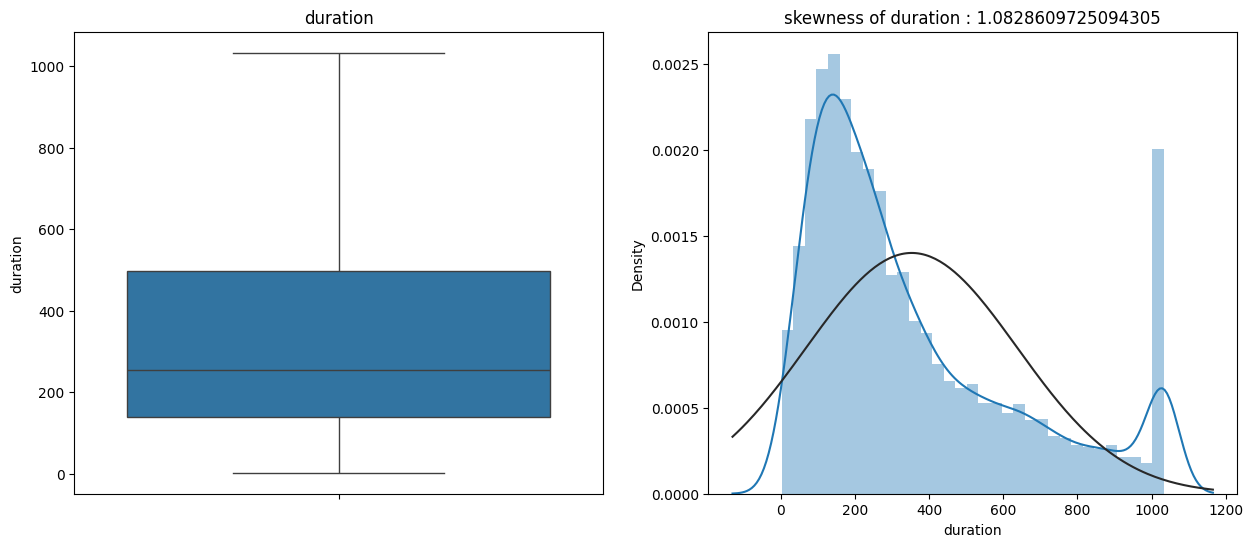

__________________________________________________________________________________________


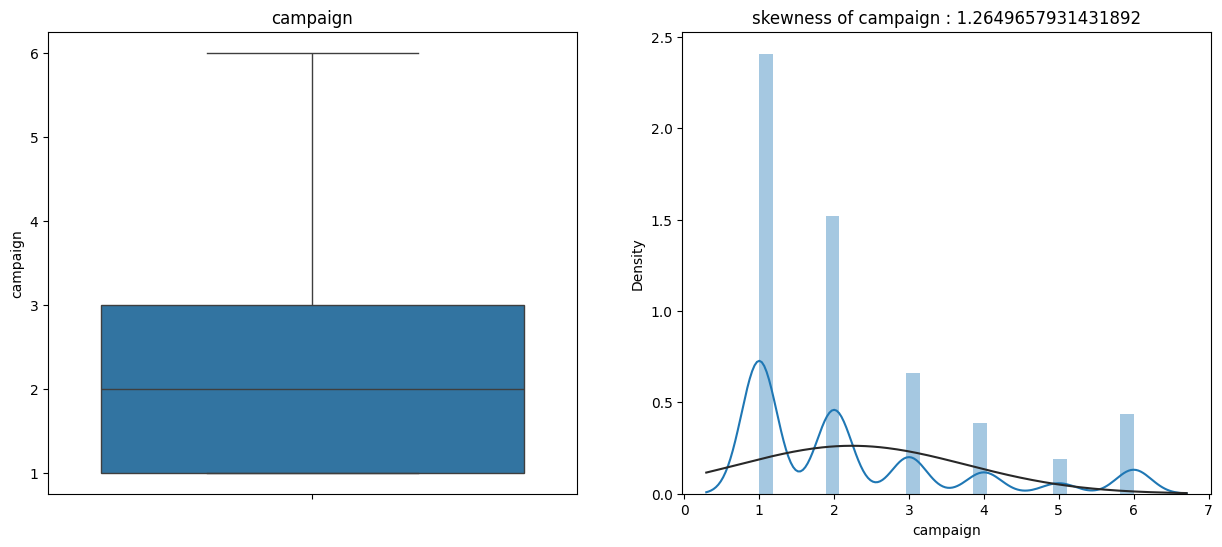

In [93]:
# Using boxplot checking outliers in features after removed using IQR

for var in outlier_var:
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    ax=sns.boxplot(data=df[var])
    ax.set_title(f'{var}')
    ax.set_ylabel(var)

    plt.subplot(1,2,2)
    ax=sns.distplot(df[var], fit=norm)
    ax.set_title(f'skewness of {var} : {df[var].skew()}')
    ax.set_xlabel(var)
    print('__'*45)
    plt.show()

- Outliers are successfully removed from the dataset.

**<u>Observations :</u>**
- This dataset contains no values that are duplicates.
- Job, education, contacts, and poutcome each have unknown values of 288; 1857; 13020; and 36959. Since unknown values are not defined and can be removed from features by treatment, they can be handled as null.
- Poutcome, contact, education, and job all have null values of 81.45%, 28.80%, 4.11%, and 0.64%, respectively.so we will remove upto 50% of them
- Replaced null values with their equivalent modes for features like contact, education, and employment. Additionally, features with more than 50% null values were eliminated because they were useless and negatively impacted model performance.
- Outliers are treated using the interquartile range for the variables age, balance, duration, campaign, p-days, and previous.

.

### **Exploratory data analysis**

#### **Univariate Analysis**

In [94]:
# Defining r to autofit the number and size of plots
r = int(len(df.columns))

In [95]:
# Defining a function to Notate the percent count of each value on the bars
def annot_percent(axes):
    '''Takes axes as input and labels the percent count of each bar in a countplot'''
    for p in plot.patches:
        total = sum(p.get_height() for p in plot.patches)/100
        percent = round((p.get_height()/total),2)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        plot.annotate(f'{percent}%', (x, y), ha='center', va='bottom')

In [96]:
# Rename the 'deposit' column to 'y'
df = df.rename(columns={'deposit': 'y'})

#### **Bivariate Analysis**

<Axes: title={'center': 'Number of clients who subscribed bank term deposit as per their job and education'}, xlabel='job,education,y'>

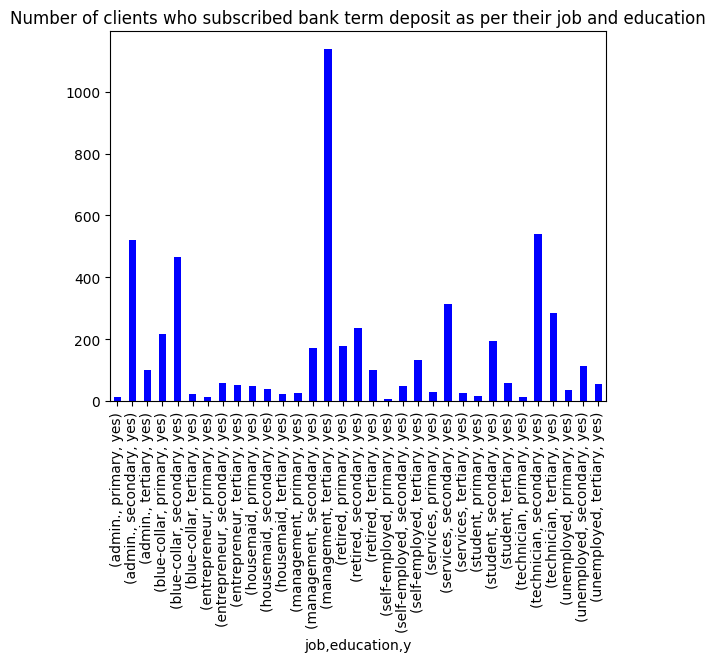

In [97]:
# Plotting a count plot to vizualize the number of customers according to their jobs and lvel of education by using group by operation

# Dataset having only subscribed Bank term deposit with job and education
subscribed_df = df[df.y=='yes']
subscribed_df2=subscribed_df.groupby(['job','education','y'])['y'].count()

# Plotting bar plot for subscribed Bank term deposit with job and education
subscribed_df2.plot(kind="bar",title = 'Number of clients who subscribed bank term deposit as per their job and education', color="blue")

**<u>Observations :</u>**
- Most clients who have management-related jobs and a tertiary degree have subscribed to the term deposits.
- Customers with a secondary education are the second most likely to subscribe to term deposits.

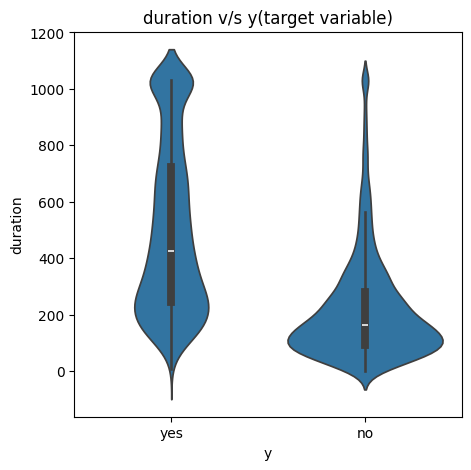

In [98]:
# Plotting box plot for checking the spread of duration in seconds for the target variable(yes or no)
plt.figure(figsize=(5,5))
plot=plt.subplot(111)
ax=sns.violinplot(x=df['y'], y=df['duration'])
ax.set_title('duration v/s y(target variable)')
annot_percent(plot)
plt.show()

**<u>Observations :</u>**
- Clients are more likely to subscribe to term deposits if they spend more time on the phone.
- Average of 400 seconds required to convey clients' intent to subscribe and make a term deposit

<Axes: title={'center': 'Number of clients who subscribed bank term deposit as per their housing loan and personal loan'}, ylabel='loan,housing'>

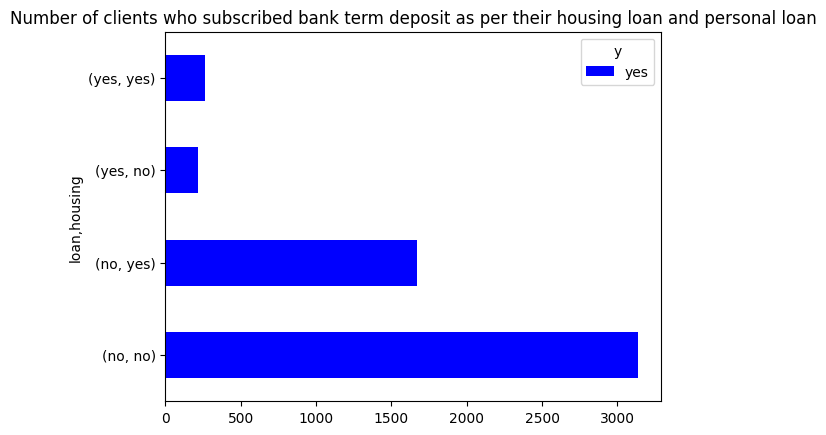

In [99]:
# Plotting bar graph to vizualize the count of clients who have opted for a term deposit given their housing loan and personal loan

# Dataset having only subscribed Bank term deposit with housing loan and personal loan
df_loan_yes = df[df.y=='yes']
df_loan_yes2=df_loan_yes.groupby(['loan','housing','y'])['y'].count().unstack()

# Plotting bar plot for subscribed Bank term deposit with housing loan and personal loan
df_loan_yes2.plot(kind="barh",title = 'Number of clients who subscribed bank term deposit as per their housing loan and personal loan', color="blue")

**<u>Observations :</u>**
- A customer is more likely to sign up for a term deposit if he is entirely debt-free.
- Customers are less likely to choose a term deposit if they already have both types of loans.

#### **Multivariate Analysis**

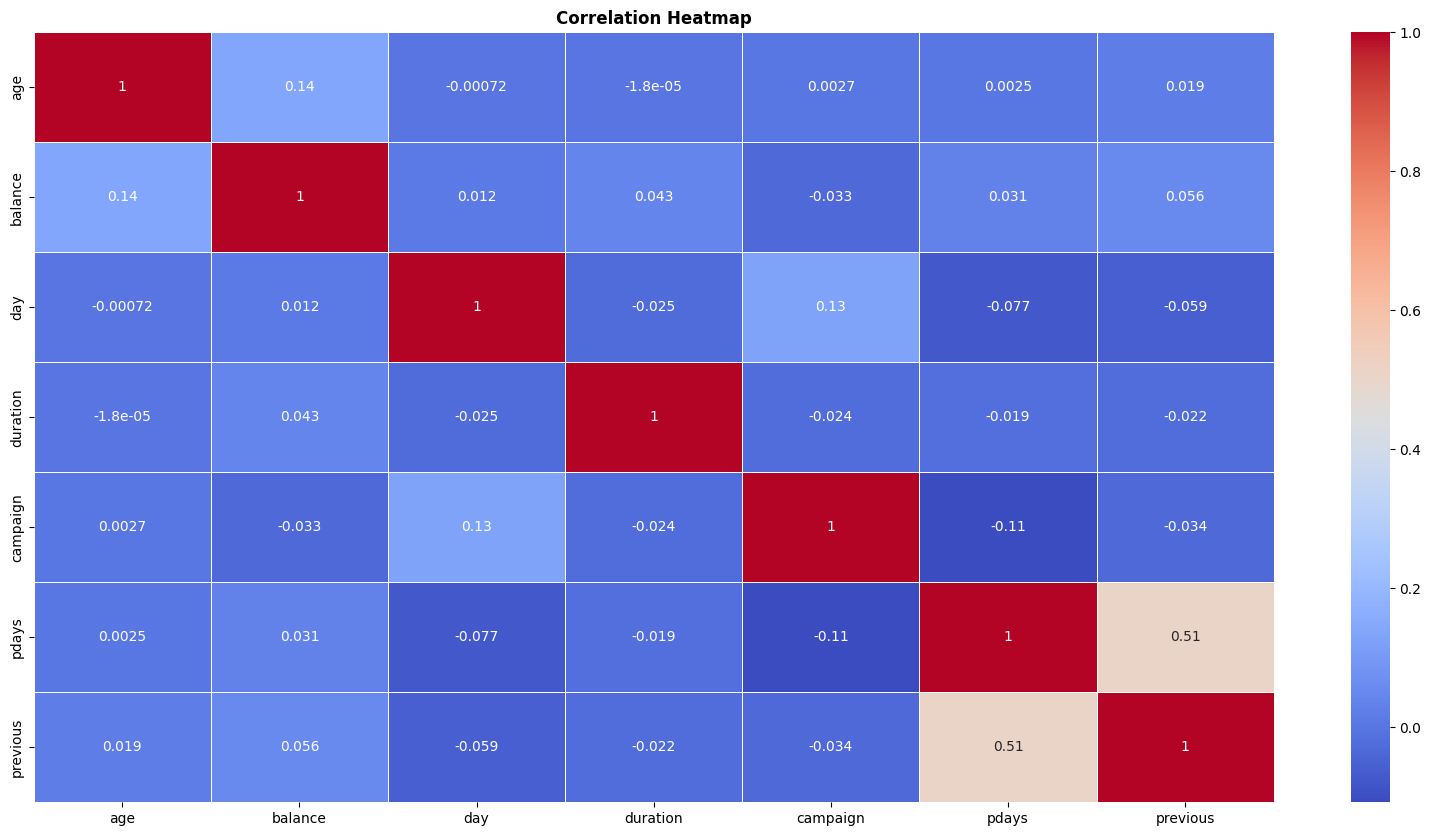

In [100]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Plotting the heatmap
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(numeric_df.corr(), ax=ax, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap', weight='bold')
plt.show()


**<u>Observations :</u>**
- There is no correlation between any independent variables.

### **Data Pre-processing**

#### **Categorical Encoding**

In [101]:
# Checking basic info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        11162 non-null  float64
 1   job        11162 non-null  object 
 2   marital    11162 non-null  object 
 3   education  11162 non-null  object 
 4   default    11162 non-null  object 
 5   balance    11162 non-null  int64  
 6   housing    11162 non-null  object 
 7   loan       11162 non-null  object 
 8   contact    11162 non-null  object 
 9   day        11162 non-null  int64  
 10  month      11162 non-null  object 
 11  duration   11162 non-null  int64  
 12  campaign   11162 non-null  int64  
 13  pdays      11162 non-null  int64  
 14  previous   11162 non-null  int64  
 15  y          11162 non-null  object 
dtypes: float64(1), int64(6), object(9)
memory usage: 1.4+ MB


In [102]:
# Addressing categorical variables from the dataset
categorical_variables=df.describe(include=['object']).columns
print(f'Categorical variables are : {list(categorical_variables)}')

Categorical variables are : ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'y']


In [103]:
# Checking categories in each categorical features
for var in categorical_variables:
    print(df[var].value_counts())
    print('__'*45)

job
management       2636
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
Name: count, dtype: int64
__________________________________________________________________________________________
marital
married     6351
single      3518
divorced    1293
Name: count, dtype: int64
__________________________________________________________________________________________
education
secondary    5973
tertiary     3689
primary      1500
Name: count, dtype: int64
__________________________________________________________________________________________
default
no     10994
yes      168
Name: count, dtype: int64
__________________________________________________________________________________________
housing
no     5881
yes    5281
Name: count, dtype: int64
_______________________________________________________________________

**<u>Observations :</u>**
- With only a few categories for the categorical variables marital, education, default, housing, loan, contact, and y, label encoding can be applied. One hot encoding can be used for the categorical variables job and month, as they have numerous categories.

In [104]:
## label encoding

# Mapping the categorical variables whoes having limited categories
df['marital'] = df['marital'].map({'single':0,'married':1,'divorced':2})
df['education'] = df['education'].map({'secondary':0,'tertiary':1, 'primary':2})
df['default'] = df['default'].map({'yes':1,'no':0})
df['housing'] = df['housing'].map({'yes':1,'no':0})
df['loan'] = df['loan'].map({'yes':1,'no':0})
df['contact'] = df['contact'].map({'cellular':1,'telephone':0})
df['y'] = df['y'].map({'yes':1,'no':0})

In [105]:
## One hot encoding for variable job and month
df=pd.get_dummies(df, columns=['job', "month"], prefix=["job", "month"], drop_first=True).astype('int64')

In [106]:
# Checking basic information of dataset after feature encoding
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                11162 non-null  int64
 1   marital            11162 non-null  int64
 2   education          11162 non-null  int64
 3   default            11162 non-null  int64
 4   balance            11162 non-null  int64
 5   housing            11162 non-null  int64
 6   loan               11162 non-null  int64
 7   contact            11162 non-null  int64
 8   day                11162 non-null  int64
 9   duration           11162 non-null  int64
 10  campaign           11162 non-null  int64
 11  pdays              11162 non-null  int64
 12  previous           11162 non-null  int64
 13  y                  11162 non-null  int64
 14  job_blue-collar    11162 non-null  int64
 15  job_entrepreneur   11162 non-null  int64
 16  job_housemaid      11162 non-null  int64
 17  job_manageme

In [107]:
# Final Dataset
pd.set_option('display.max_columns', None)
df.head()

,age,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,59,1,0,0,2343,1,0,1,5,1033,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,56,1,0,0,45,0,0,1,5,1033,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,41,1,0,0,1270,1,0,1,5,1033,1,-1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,55,1,0,0,2476,1,0,1,5,579,1,-1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,54,1,1,0,184,0,0,1,5,673,2,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


.

In [166]:
df.columns

Index(['age', 'marital', 'education', 'default', 'balance', 'housing', 'loan',
       'contact', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep'],
      dtype='object')

#### **Separating Dependant and Independant variables**

In [108]:
## Separating independant variables and dependant variable

# Creating the dataset with all dependent variables
dependent_variable = 'y'

# Creating the dataset with all independent variables
independent_variables = list(set(df.columns.tolist()) - {dependent_variable})

# Create the data of independent variables
X = df[independent_variables].copy()
# Create the data of dependent variable
y = df[dependent_variable].copy()

#### **Feature Manipulation & Selection**

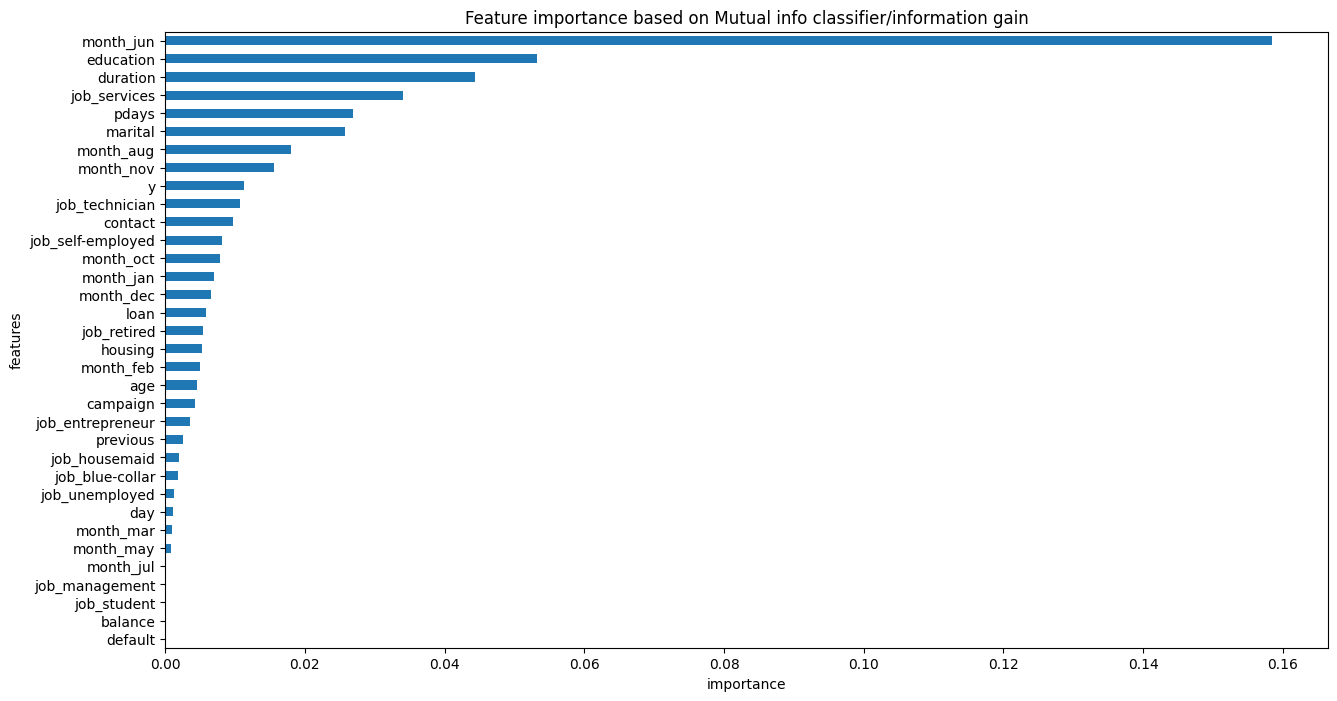

In [109]:
# Plotting feature importance for better selection to avoid overfitting

from sklearn.feature_selection import mutual_info_classif
importance = mutual_info_classif(X,y)
feature_importances = pd.Series(importance,df.columns[0:len(df.columns[0:34])]).sort_values(ascending=True)
plt.figure(figsize=(15,8))
feature_importances.plot(kind='barh')
plt.title("Feature importance based on Mutual info classifier/information gain")
plt.xlabel('importance')
plt.ylabel('features')
plt.show()

**<u>Observations :</u>**
- Important features are listed in descending order of their importance and can be removed if they are no longer important, but all the features that we have included have significant importance, so we are keeping all of them.

#### **Handling Imbalanced Dataset**

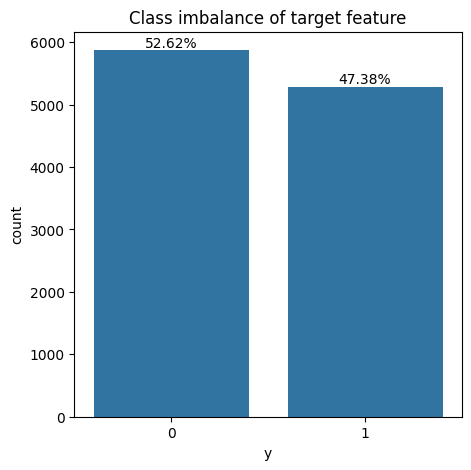

In [110]:
# Plotting bar graph to vizualize the class imbalance of target feature
plt.figure(figsize=(5,5))
plot=plt.subplot(111)
sns.countplot(x=df['y'])
plt.title('Class imbalance of target feature')
annot_percent(plot)
plt.show()

- We clearly detect a class imbalance beacause discovered that the number of clients who subscribed to term deposits is 11.7% lower than the number of clients who did not (88.3%).

In [112]:
# Using Synthetic Minority Oversampling Technique (SMOTE) for handling class imbalance
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X,y)

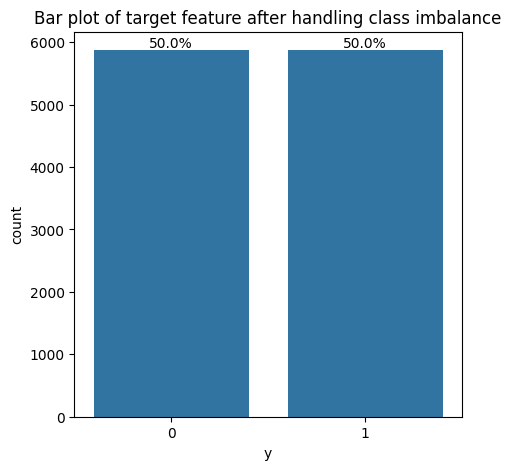

In [113]:
# Plotting bar graph to vizualize the class imbalance of target feature
plt.figure(figsize=(5,5))
plot=plt.subplot(111)
sns.countplot(x=y_smote)
plt.title('Bar plot of target feature after handling class imbalance')
annot_percent(plot)
plt.show()

#### **Data Splitting**

In [114]:
# Splitting dataset into training set and test set
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test= train_test_split(x_smote, y_smote, test_size=0.2, random_state=42)

In [115]:
# Checking shape of split
print(f'Shape of X_train : {X_train.shape}')
print(f'Shape of X_test : {X_test.shape}')
print(f'Shape of y_train : {y_train.shape}')
print(f'Shape of y_test : {y_test.shape}')

Shape of X_train : (9396, 34)
Shape of X_test : (2350, 34)
Shape of y_train : (9396,)
Shape of y_test : (2350,)


- We divided the dataset into 20% for model testing and 80% for training.

In [116]:
# Checking values of splitted dataset
X_train[0:3]

,loan,age,pdays,job_housemaid,month_jul,default,job_self-employed,education,month_dec,balance,campaign,housing,month_nov,month_sep,job_entrepreneur,job_services,contact,job_management,job_retired,month_may,previous,month_jun,marital,job_technician,day,month_aug,job_student,month_feb,job_unemployed,duration,job_blue-collar,month_jan,month_oct,month_mar
1247,0,71,-1,0,0,0,0,2,0,4087,5,0,0,0,0,0,1,0,1,0,0,0,1,0,16,0,0,1,0,93,0,0,0,0
655,0,49,-1,0,1,0,0,0,0,388,4,0,0,0,0,1,0,0,0,0,0,0,1,0,31,0,0,0,0,1032,0,0,0,0
623,0,49,-1,0,1,1,0,0,0,-701,2,1,0,0,1,0,1,0,0,0,0,0,2,0,30,0,0,0,0,988,0,0,0,0


In [117]:
# Checking values of splitted dataset
X_test[0:3]

,loan,age,pdays,job_housemaid,month_jul,default,job_self-employed,education,month_dec,balance,campaign,housing,month_nov,month_sep,job_entrepreneur,job_services,contact,job_management,job_retired,month_may,previous,month_jun,marital,job_technician,day,month_aug,job_student,month_feb,job_unemployed,duration,job_blue-collar,month_jan,month_oct,month_mar
11470,0,39,194,0,0,0,0,0,0,558,2,0,0,0,0,0,1,0,0,0,3,0,0,0,15,0,0,0,0,168,0,0,0,0
8742,1,44,295,0,0,0,0,0,0,860,2,1,0,0,1,0,1,0,0,1,5,0,1,0,6,0,0,0,0,96,0,0,0,0
1277,0,44,-1,0,0,0,0,2,0,558,5,0,0,0,0,0,1,1,0,0,0,0,1,0,19,0,0,1,0,268,0,0,0,0


#### **Data Scaling**

In [118]:
# Transforming data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [167]:
# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

- MinMaxScaler preserves the shape of the original distribution. It doesn't meaningfully change the information embedded in the original data. So we used MinMaxScaler for scaling the dataset.

In [119]:
# Checking values of splitted dataset after normalisation
X_train[0:5]

array([[0.        , 0.94642857, 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 1.        ,
        0.8       , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.5       , 0.        , 0.5       ,
        0.        , 0.        , 1.        , 0.        , 0.08826382,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.55357143, 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.41692938,
        0.6       , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.5       , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.99903007,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.55357143, 0.        , 0.        , 1.        ,
  

In [120]:
# Checking values of splitted dataset after normalisation
X_test[0:5]

array([[0.        , 0.375     , 0.22807018, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.44372636,
        0.2       , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.05172414, 0.        , 0.        , 0.        , 0.46666667,
        0.        , 0.        , 0.        , 0.        , 0.16100873,
        0.        , 0.        , 0.        , 0.        ],
       [1.        , 0.46428571, 0.34619883, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.49133039,
        0.2       , 1.        , 0.        , 0.        , 1.        ,
        0.        , 1.        , 0.        , 0.        , 1.        ,
        0.0862069 , 0.        , 0.5       , 0.        , 0.16666667,
        0.        , 0.        , 0.        , 0.        , 0.09117362,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.46428571, 0.        , 0.        , 0.        ,
  

### **Model Implementation**

In [122]:
# Defining function which fit classification algoritham, evaluate and visualise model using train test split

# Import evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

# Defining function
def classification_model(X_train, X_test, y_train, y_test, clf):
    """
    function fit the algorithm on the training set, evaluate the model, and visualise evaluation metrics
    """
    ## Fit the model using training dataset
    model=clf.fit(X_train, y_train)
    print(model)
    print('=='*45)
    
    ## Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    ## Evaluate the model
    print('Training set evaluation result :\n')
    cm_train = confusion_matrix(y_train, y_train_pred)
    accuracy_train = accuracy_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred)
    recall_train = recall_score(y_train, y_train_pred)
    f1_train = f1_score(y_train, y_train_pred)
    roc_auc_score_train=roc_auc_score(y_train, y_train_pred)
    print("Confusion Matrix: \n", cm_train)
    print("Accuracy: ", accuracy_train)
    print("Precision: ", precision_train)
    print("Recall: ", recall_train)
    print("F1 Score: ", f1_train)
    print("roc_auc_score: ", roc_auc_score_train)
    print('\n-------------------------------\n')
    print('Test set evaluation result :\n')
    cm_test = confusion_matrix(y_test, y_test_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred)
    recall_test = recall_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred)
    roc_auc_score_test=roc_auc_score(y_test, y_test_pred)
    print("Confusion Matrix: \n", cm_test)
    print("Accuracy: ", accuracy_test)
    print("Precision: ", precision_test)
    print("Recall: ", recall_test)
    print("F1 Score: ", f1_test)
    print("roc_auc_score: ", roc_auc_score_test)
    print('=='*45)
    
    ## Visualizes evaluation metrics
    fig,axes = plt.subplots(nrows=2, ncols=2)
    ax1 = sns.heatmap(cm_train, annot=True, ax=axes[0,0], fmt='d')
    ax1.set_title('Confusion Matrix for training set')
    ax1.set_ylabel('True label')
    ax1.set_xlabel('Predicted label')
    ax2 = sns.heatmap(cm_test, annot=True, ax=axes[0,1], fmt='d')
    ax2.set_title('Confusion Matrix for test set')
    ax2.set_ylabel('True label')
    ax2.set_xlabel('Predicted label')
    ax3 = sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1','roc_auc_score'], y=[accuracy_train, precision_train, recall_train, f1_train, roc_auc_score_train], ax=axes[1,0])
    ax3.set_title('Evaluation Metrics for training set')
    ax3.tick_params(axis='x', rotation=90)
    ax4 = sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1','roc_auc_score'], y=[accuracy_test, precision_test, recall_test, f1_test, roc_auc_score_test], ax=axes[1,1])
    ax4.set_title('Evaluation Metrics for test set')
    ax4.tick_params(axis='x', rotation=90)
    plt.tight_layout()
    plt.show()
    print('=='*45)
    
    return {'model': model, 'y_train_pred': y_train_pred, 'y_test_pred': y_test_pred, 'cm_test': cm_test, 'accuracy_test': accuracy_test, 
            'precision_test': precision_test, 'recall_test': recall_test, 'f1_test': f1_test, 'roc_auc_score_test': roc_auc_score_test}

In [123]:
# Defining function which fit classification algoritham using GridSearchCV, evaluate and visualise model

# Import necessary dependancy
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV

# Defining function
def classification_CV_model(X_train, X_test, y_train, y_test, clf, param_grid):
    """
    function fit the algorithm using GridSearchCV on the training set, evaluate the model, and visualise evaluation metrics
    """
    ## Fit the model on training dataset
    classifier = clf
    model = GridSearchCV(classifier, param_grid, verbose=1, scoring='accuracy', cv=3, n_jobs=-1)
    model.fit(X_train, y_train)
    print(model)
    print('=='*45)
    
    # Print the best parameters and score
    print("Best parameters:", model.best_params_)
    print("Best score:", model.best_score_)
    print('=='*45)
    
    ## Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    ## Evaluate the model
    print('Training set evaluation result :\n')
    cm_train = confusion_matrix(y_train, y_train_pred)
    accuracy_train = accuracy_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred)
    recall_train = recall_score(y_train, y_train_pred)
    f1_train = f1_score(y_train, y_train_pred)
    roc_auc_score_train=roc_auc_score(y_train, y_train_pred)
    print("Confusion Matrix: \n", cm_train)
    print("Accuracy: ", accuracy_train)
    print("Precision: ", precision_train)
    print("Recall: ", recall_train)
    print("F1 Score: ", f1_train)
    print("roc_auc_score: ", roc_auc_score_train)
    print('\n-------------------------------\n')
    print('Test set evaluation result :\n')
    cm_test = confusion_matrix(y_test, y_test_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred)
    recall_test = recall_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred)
    roc_auc_score_test=roc_auc_score(y_test, y_test_pred)
    print("Confusion Matrix: \n", cm_test)
    print("Accuracy: ", accuracy_test)
    print("Precision: ", precision_test)
    print("Recall: ", recall_test)
    print("F1 Score: ", f1_test)
    print("roc_auc_score: ", roc_auc_score_test)
    print('=='*45)
    
    ## Visualizes evaluation metrics
    fig,axes = plt.subplots(nrows=2, ncols=2)
    ax1 = sns.heatmap(cm_train, annot=True, ax=axes[0,0], fmt='d')
    ax1.set_title('Confusion Matrix for training set')
    ax1.set_ylabel('True label')
    ax1.set_xlabel('Predicted label')
    ax2 = sns.heatmap(cm_test, annot=True, ax=axes[0,1], fmt='d')
    ax2.set_title('Confusion Matrix for test set')
    ax2.set_ylabel('True label')
    ax2.set_xlabel('Predicted label')
    ax3 = sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1','roc_auc_score'], y=[accuracy_train, precision_train, recall_train, f1_train, roc_auc_score_train], ax=axes[1,0])
    ax3.set_title('Evaluation Metrics for training set')
    ax3.tick_params(axis='x', rotation=90)
    ax4 = sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1','roc_auc_score'], y=[accuracy_test, precision_test, recall_test, f1_test, roc_auc_score_test], ax=axes[1,1])
    ax4.set_title('Evaluation Metrics for test set')
    ax4.tick_params(axis='x', rotation=90)
    plt.tight_layout()
    plt.show()
    print('=='*45)
    
    return {'model': model, 'y_train_pred': y_train_pred, 'y_test_pred': y_test_pred, 'cm_test': cm_test, 'accuracy_test': accuracy_test, 
            'precision_test': precision_test, 'recall_test': recall_test, 'f1_test': f1_test, 'roc_auc_score_test': roc_auc_score_test}

In [124]:
# Defining function to plot ROC curve
def plot_roc_curve(y_test, y_pred):
    """
    plots the roc curve
    """
    # Generate a list of false and true positive rates 
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    # Calculate the area under the curve (AUC) 
    roc_auc = auc(fpr, tpr) 
    # Plotting the ROC curve 
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='ROC curve (AUC = %0.4f)' % roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    # Labeling the graph
    plt.xlabel('False Positive Rate (Precision)')
    plt.ylabel('True Positive Rate (Recall)')
    plt.title('Receiver Operating Characteristic Curve') 
    plt.legend(loc="lower right")
    # Show the plot
    plt.show()

### **1. Logistic Regression**

LogisticRegression(max_iter=10000, random_state=0)
Training set evaluation result :

Confusion Matrix: 
 [[3895  807]
 [ 908 3786]]
Accuracy:  0.81747552149851
Precision:  0.8242978445460484
Recall:  0.8065615679590967
F1 Score:  0.815333261548401
roc_auc_score:  0.8174662369782723

-------------------------------

Test set evaluation result :

Confusion Matrix: 
 [[968 203]
 [231 948]]
Accuracy:  0.8153191489361702
Precision:  0.8236316246741964
Recall:  0.8040712468193384
F1 Score:  0.8137339055793992
roc_auc_score:  0.8153575704634692


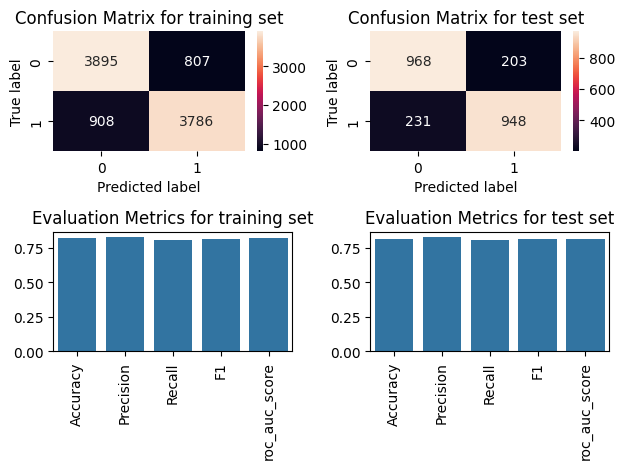

In [125]:
# Import Logistic Regression algoritham in envirnoment
from sklearn.linear_model import LogisticRegression
# Fitting Logistic Regression model to training set
Logistic_regression=LogisticRegression(fit_intercept=True, max_iter=10000,random_state=0)
lr=classification_model(X_train, X_test, y_train, y_test, Logistic_regression)

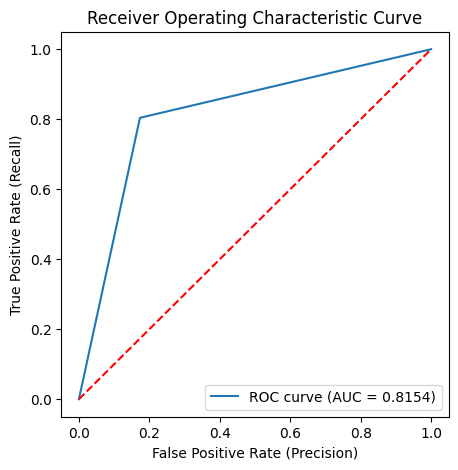

In [126]:
# Plot roc curve for Logistic Regression classifier
y_pred=lr['y_test_pred']
plot_roc_curve(y_test, y_pred)

#### **<u>Cross- Validation & Hyperparameter Tuning</u>**

Fitting 3 folds for each of 7 candidates, totalling 21 fits
GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, random_state=0),
             n_jobs=-1, param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             scoring='accuracy', verbose=1)
Best parameters: {'C': 10}
Best score: 0.8154533844189017
Training set evaluation result :

Confusion Matrix: 
 [[3889  813]
 [ 912 3782]]
Accuracy:  0.816411238825032
Precision:  0.8230685527747552
Recall:  0.8057094162760972
F1 Score:  0.8142964797071806
roc_auc_score:  0.8164021347650159

-------------------------------

Test set evaluation result :

Confusion Matrix: 
 [[968 203]
 [230 949]]
Accuracy:  0.8157446808510638
Precision:  0.8237847222222222
Recall:  0.804919423240034
F1 Score:  0.8142428142428142
roc_auc_score:  0.8157816586738171


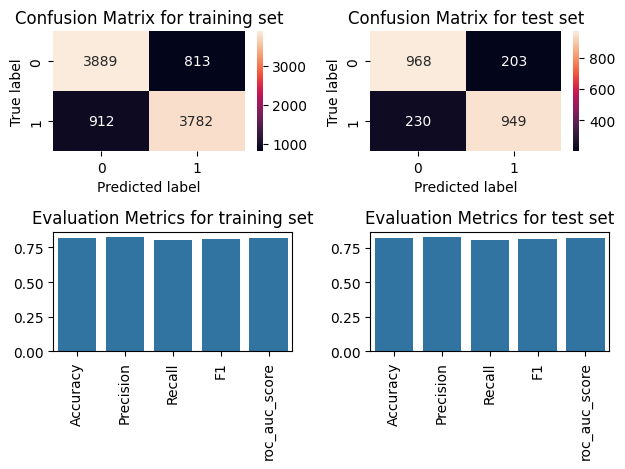

In [127]:
## Import Logistic Regression algoritham in envirnoment
from sklearn.linear_model import LogisticRegression
# Defined param_dict
param_grid ={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
# Creating instance of Logistic Regression classifier
Logistic_regression=LogisticRegression(fit_intercept=True, max_iter=10000,random_state=0)
# Fitting model
lr_cv=classification_CV_model(X_train, X_test, y_train, y_test, Logistic_regression, param_grid)

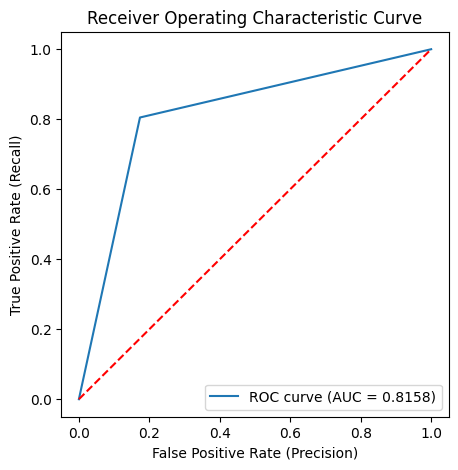

In [128]:
# Plot roc curve for Logistic Regression for cross validation
y_pred=lr_cv['y_test_pred']
plot_roc_curve(y_test, y_pred)

#### **Comparing Evaluation Metrics**

******************************************************************************************
  Evaluation Metrics  Train/Test Split  Cross-Validation
0           Accuracy          0.815319          0.815745
1          Precision          0.823632          0.823785
2             Recall          0.804071          0.804919
3           F1-score          0.813734          0.814243
4      roc_auc_score          0.815358          0.815782
******************************************************************************************


<Figure size 700x700 with 0 Axes>

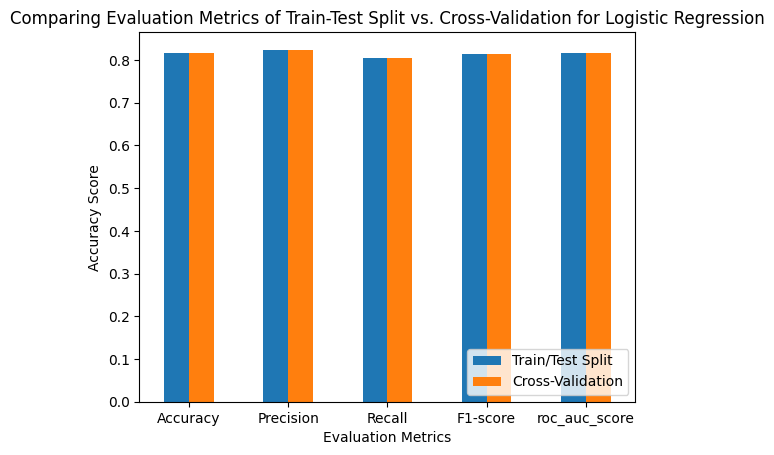

In [132]:
import pandas as pd
import matplotlib.pyplot as plt

# Data 
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'roc_auc_score']
train_test_split = [lr['accuracy_test'], lr['precision_test'], lr['recall_test'], lr['f1_test'], lr['roc_auc_score_test']]
cross_validation = [lr_cv['accuracy_test'], lr_cv['precision_test'], lr_cv['recall_test'], lr_cv['f1_test'], lr_cv['roc_auc_score_test']]

# Create a dataframe
lr_evaluation_df = pd.DataFrame({'Evaluation Metrics': metrics,
                                  'Train/Test Split': train_test_split,
                                  'Cross-Validation': cross_validation})

# Print dataframe without tabulate
print('*' * 90)
print(lr_evaluation_df)
print('*' * 90)

# Create a barplot
plt.figure(figsize=(7, 7))
ax = lr_evaluation_df.plot.bar(x='Evaluation Metrics', rot=0)

# Set the title and labels
ax.set_title("Comparing Evaluation Metrics of Train-Test Split vs. Cross-Validation for Logistic Regression")
ax.set_xlabel("Evaluation Metrics")
ax.set_ylabel("Accuracy Score")
ax.legend(loc="lower right")

# Show the plot
plt.show()
print('=' * 90)


**Observations :**
- We saw no improvement in the model after training with cross-validation.
- We got 0.81  % of accuracy in logistics regression model.

### **2. Decision Tree**

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)
Training set evaluation result :

Confusion Matrix: 
 [[3248 1454]
 [ 612 4082]]
Accuracy:  0.7801191996594296
Precision:  0.7373554913294798
Recall:  0.8696207925010652
F1 Score:  0.7980449657869013
roc_auc_score:  0.7801953388281591

-------------------------------

Test set evaluation result :

Confusion Matrix: 
 [[ 789  382]
 [ 160 1019]]
Accuracy:  0.7693617021276595
Precision:  0.7273376159885796
Recall:  0.8642917726887193
F1 Score:  0.789922480620155
roc_auc_score:  0.7690374320318063


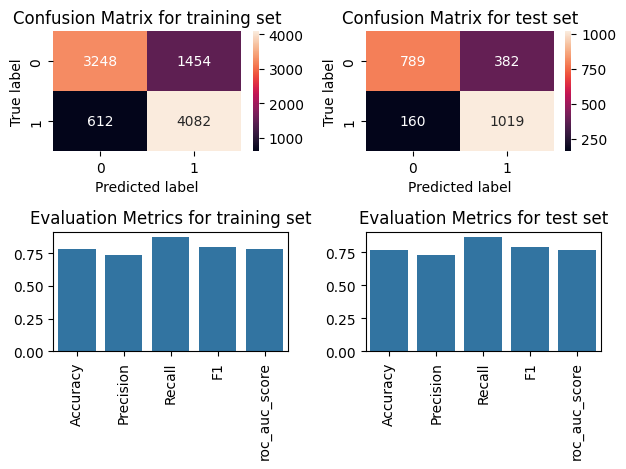

In [133]:
# Import Decision Tree algoritham in envirnoment
from sklearn.tree import DecisionTreeClassifier
# Fitting Decision Tree model to training set
classifier_dt = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)
dt=classification_model(X_train, X_test, y_train, y_test, classifier_dt)

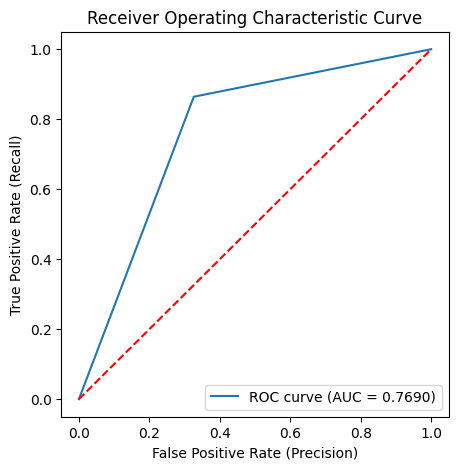

In [134]:
# Plot ROC curve for Decision Tree classifier
y_pred=dt['y_test_pred']
plot_roc_curve(y_test, y_pred)

#### **<u>Cross- Validation & Hyperparameter Tuning</u>**

Fitting 3 folds for each of 18 candidates, totalling 54 fits
GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              max_leaf_nodes=10,
                                              random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150]},
             scoring='accuracy', verbose=1)
Best parameters: {'max_depth': 4, 'min_samples_leaf': 40, 'min_samples_split': 50}
Best score: 0.7774584929757342
Training set evaluation result :

Confusion Matrix: 
 [[3418 1284]
 [ 706 3988]]
Accuracy:  0.788207747977863
Precision:  0.7564491654021245
Recall:  0.8495952279505752
F1 Score:  0.8003210917118202
roc_auc_score:  0.7882599704193539

-------------------------------

Test set evaluation result :

Confusion Matrix: 
 [[ 834  337]
 [ 179 1000]]
Accuracy:  0.7804255319148936
Precision:  0.747943156320

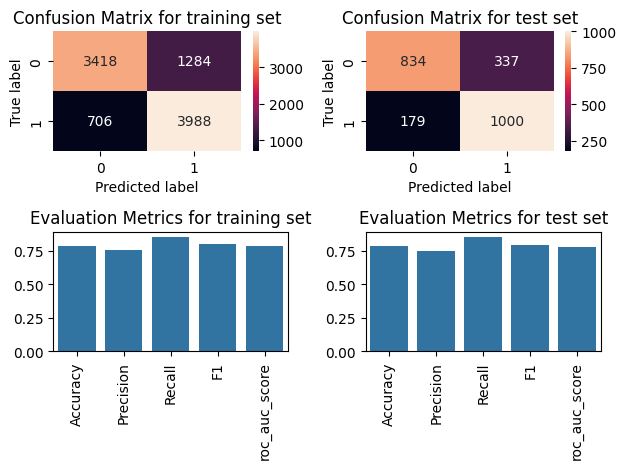

In [135]:
## Import Decision Tree algoritham in envirnoment
from sklearn.tree import DecisionTreeClassifier

## Fitting Decision Tree model to training set using cross validation

# Defining param_dict
param_grid = {'max_depth':[4,6,8],
              'min_samples_split':[50,100,150],
              'min_samples_leaf':[40,50]}
# Creating instance of Decision Tree classifier
classifier_dt = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)
#Fitting model
dt_cv=classification_CV_model(X_train, X_test, y_train, y_test, classifier_dt, param_grid)

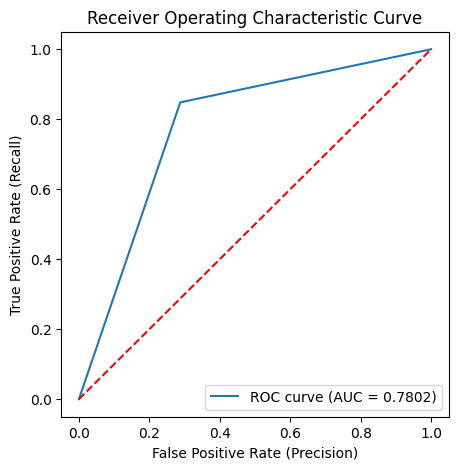

In [136]:
# Plot ROC curve for Decision Tree classifier
y_pred=dt_cv['y_test_pred']
plot_roc_curve(y_test, y_pred)

#### **Comparing Evaluation Metrics**

******************************************************************************************
  Evaluation Metrics  Train/Test Split  Cross-Validation
0           Accuracy          0.769362          0.780426
1          Precision          0.727338          0.747943
2             Recall          0.864292          0.848176
3           F1-score          0.789922          0.794913
4      roc_auc_score          0.769037          0.780194
******************************************************************************************


<Figure size 700x700 with 0 Axes>

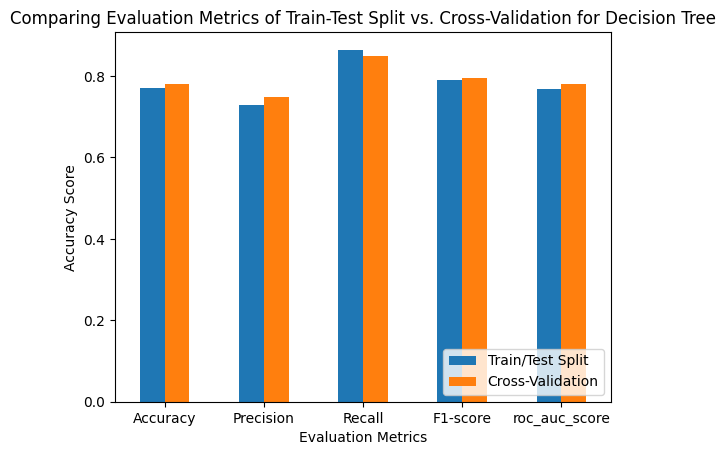

******************************************************************************************


In [146]:
import pandas as pd
import matplotlib.pyplot as plt

# Data 
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'roc_auc_score']
train_test_split = [dt['accuracy_test'], dt['precision_test'], dt['recall_test'], dt['f1_test'], dt['roc_auc_score_test']]
cross_validation = [dt_cv['accuracy_test'], dt_cv['precision_test'], dt_cv['recall_test'], dt_cv['f1_test'], dt_cv['roc_auc_score_test']]

# Create a dataframe
dt_evaluation_df = pd.DataFrame({'Evaluation Metrics': metrics,
                                  'Train/Test Split': train_test_split,
                                  'Cross-Validation': cross_validation})

# Print dataframe without tabulate
print('*' * 90)
print(dt_evaluation_df)
print('*' * 90)

# Create a barplot
plt.figure(figsize=(7, 7))
ax = dt_evaluation_df.plot.bar(x='Evaluation Metrics', rot=0)

# Set the title and labels
ax.set_title("Comparing Evaluation Metrics of Train-Test Split vs. Cross-Validation for Decision Tree")
ax.set_xlabel("Evaluation Metrics")
ax.set_ylabel("Accuracy Score")
ax.legend(loc="lower right")

# Show the plot
plt.show()
print('*' * 90)


**<u>Observations</u> :**
- There is 0.2% improvement in the model after training with cross-validation.
- We got 0.78  % of accuracy in Decision Tree model.

### **3. Random Forest**

RandomForestClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)
Training set evaluation result :

Confusion Matrix: 
 [[3646 1056]
 [ 581 4113]]
Accuracy:  0.825776926351639
Precision:  0.79570516540917
Recall:  0.8762249680443119
F1 Score:  0.8340261583696644
roc_auc_score:  0.8258198425929769

-------------------------------

Test set evaluation result :

Confusion Matrix: 
 [[ 882  289]
 [ 174 1005]]
Accuracy:  0.8029787234042554
Precision:  0.776661514683153
Recall:  0.8524173027989822
F1 Score:  0.812778002426203
roc_auc_score:  0.8028098469588422


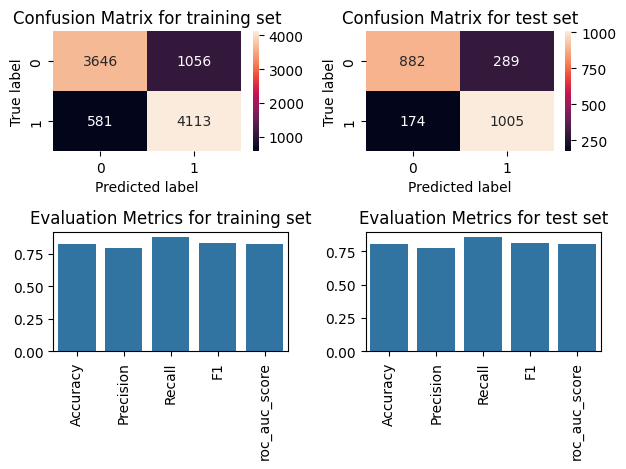

In [139]:
# Import Random Forest algoritham in envirnoment
from sklearn.ensemble import RandomForestClassifier
# Fitting Random Forest model to training set
classifier_rf = RandomForestClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)
rf=classification_model(X_train, X_test, y_train, y_test, classifier_rf)

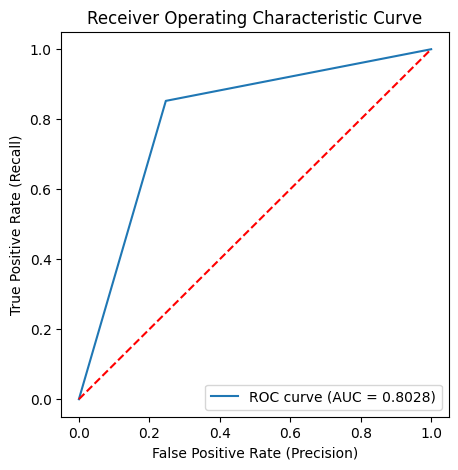

In [140]:
# Plot ROC curve for Random Forest classifier
y_pred=rf['y_test_pred']
plot_roc_curve(y_test, y_pred)

#### **<u>Cross- Validation & Hyperparameter Tuning</u>**

Fitting 3 folds for each of 54 candidates, totalling 162 fits
GridSearchCV(cv=3,
             estimator=RandomForestClassifier(criterion='entropy',
                                              max_leaf_nodes=10,
                                              random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             scoring='accuracy', verbose=1)
Best parameters: {'max_depth': 8, 'min_samples_leaf': 40, 'min_samples_split': 50, 'n_estimators': 80}
Best score: 0.816943380161771
Training set evaluation result :

Confusion Matrix: 
 [[3607 1095]
 [ 584 4110]]
Accuracy:  0.8213069391230311
Precision:  0.7896253602305475
Recall:  0.8755858542820623
F1 Score:  0.8303869077684615
roc_auc_score:  0.8213531142954336

-------------------------------

Test set evaluation result :

Confusion Matrix: 
 [[ 884

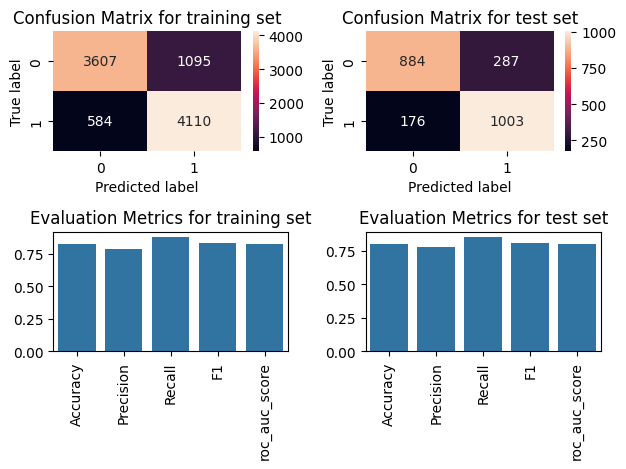

In [141]:
# Import Random Forest algoritham in envirnoment
from sklearn.ensemble import RandomForestClassifier

## Fitting Random Forest model to training set using cross validation

# Defining param_dict
param_grid = {'n_estimators':[50,80,100],
              'max_depth':[4,6,8],
              'min_samples_split':[50,100,150],
              'min_samples_leaf':[40,50]}
# Creating instance of Random Forest classifier
classifier_rf = RandomForestClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)
# Fitting model
rf_cv=classification_CV_model(X_train, X_test, y_train, y_test, classifier_rf, param_grid)

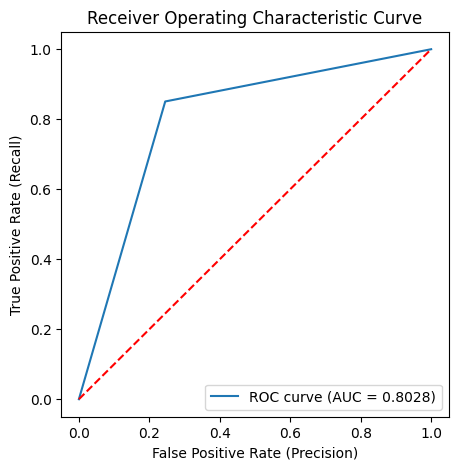

In [142]:
# Plot ROC curve for Random Forest classifier
y_pred=rf_cv['y_test_pred']
plot_roc_curve(y_test, y_pred)

#### **Comparing Evaluation Metrics**

******************************************************************************************
  Evaluation Metrics  Train/Test Split  Cross-Validation
0           Accuracy          0.802979          0.802979
1          Precision          0.776662          0.777519
2             Recall          0.852417          0.850721
3           F1-score          0.812778          0.812475
4      roc_auc_score          0.802810          0.802816
******************************************************************************************


<Figure size 700x700 with 0 Axes>

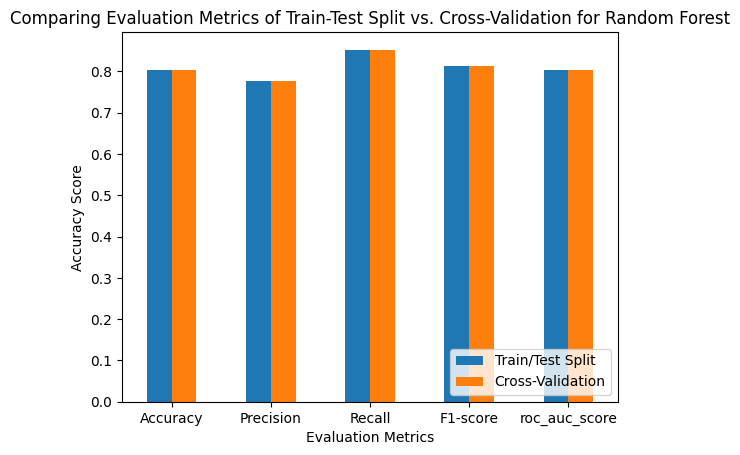

******************************************************************************************


In [147]:
import pandas as pd
import matplotlib.pyplot as plt

# Data 
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'roc_auc_score']
train_test_split = [rf['accuracy_test'], rf['precision_test'], rf['recall_test'], rf['f1_test'], rf['roc_auc_score_test']]
cross_validation = [rf_cv['accuracy_test'], rf_cv['precision_test'], rf_cv['recall_test'], rf_cv['f1_test'], rf_cv['roc_auc_score_test']]

# Create a dataframe
rf_evaluation_df = pd.DataFrame({'Evaluation Metrics': metrics,
                                  'Train/Test Split': train_test_split,
                                  'Cross-Validation': cross_validation})

# Print dataframe without tabulate
print('*' * 90)
print(rf_evaluation_df)
print('*' * 90)

# Create a barplot
plt.figure(figsize=(7, 7))
ax = rf_evaluation_df.plot.bar(x='Evaluation Metrics', rot=0)

# Set the title and labels
ax.set_title("Comparing Evaluation Metrics of Train-Test Split vs. Cross-Validation for Random Forest")
ax.set_xlabel("Evaluation Metrics")
ax.set_ylabel("Accuracy Score")
ax.legend(loc="lower right")

# Show the plot
plt.show()
print('*' * 90)


In [173]:
import joblib

# Save the trained Random Forest model
joblib.dump(classifier_rf, 'random_forest_model.pkl')

['random_forest_model.pkl']

**<u>Observations</u> :**
- We saw slightly improvement in the model after training with cross-validation.
- Mejor improvement seen in reacall.
- We got 0.80 % of accuracy using train_test_split and 0.82 % of accuracy using cross validation in Random Forest model.

## **Comparing Different Models based on the Evaluation Metrics**

In [159]:
# Data
model = ['Logistic_Regression', 'Decision_Tree', 'Random_Forest']
Accuracy = [lr_cv['accuracy_test'], dt_cv['accuracy_test'], rf_cv['accuracy_test']]
Precision = [lr_cv['precision_test'], dt_cv['precision_test'], rf_cv['precision_test']]
Recall = [lr_cv['recall_test'], dt_cv['recall_test'], rf_cv['recall_test']]
F1_score = [lr_cv['f1_test'], dt_cv['f1_test'], rf_cv['f1_test']]
roc_auc_score = [lr_cv['roc_auc_score_test'], dt_cv['roc_auc_score_test'], rf_cv['roc_auc_score_test']]
confusion_matrix = [lr_cv['cm_test'], dt_cv['cm_test'], rf_cv['cm_test']]

# Create a dataframe
models_evaluation_df = pd.DataFrame({
    'model': model,
    'Accuracy': Accuracy,
    'Precision': Precision,
    'Recall': Recall,
    'F1_score': F1_score,
    'roc_auc_score': roc_auc_score,
    'confusion matrix': confusion_matrix
})

# Dataframe
models_evaluation_df

,model,Accuracy,Precision,Recall,F1_score,roc_auc_score,confusion matrix
0,Logistic_Regression,0.815745,0.823785,0.804919,0.814243,0.815782,"[[968, 203], [230, 949]]"
1,Decision_Tree,0.780426,0.747943,0.848176,0.794913,0.780194,"[[834, 337], [179, 1000]]"
2,Random_Forest,0.802979,0.777519,0.850721,0.812475,0.802816,"[[884, 287], [176, 1003]]"


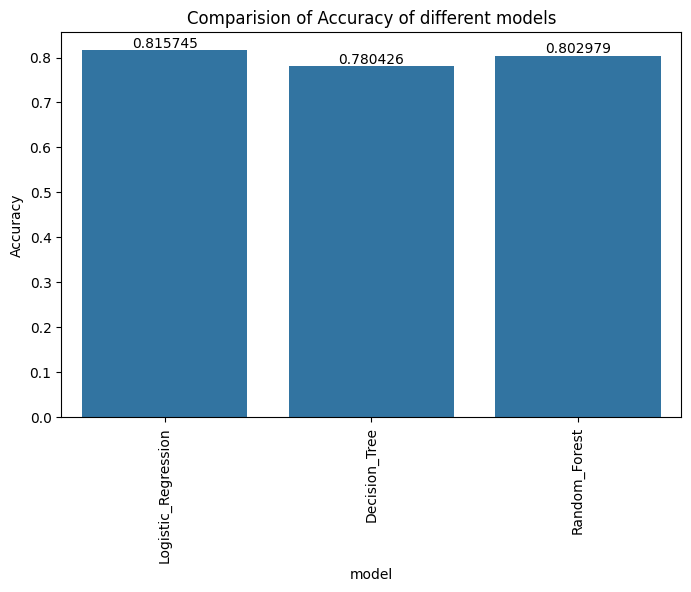

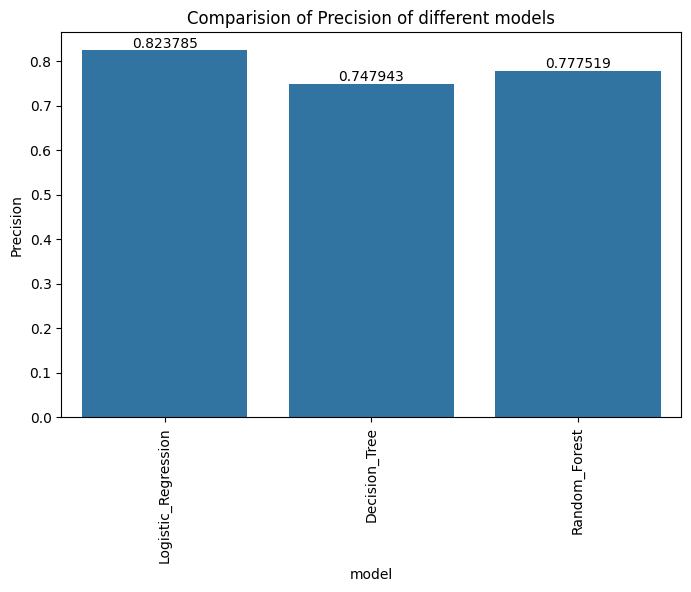

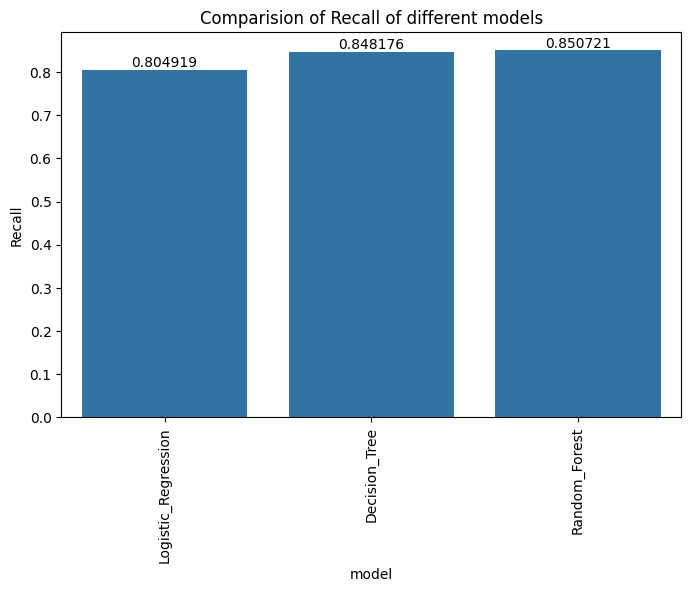

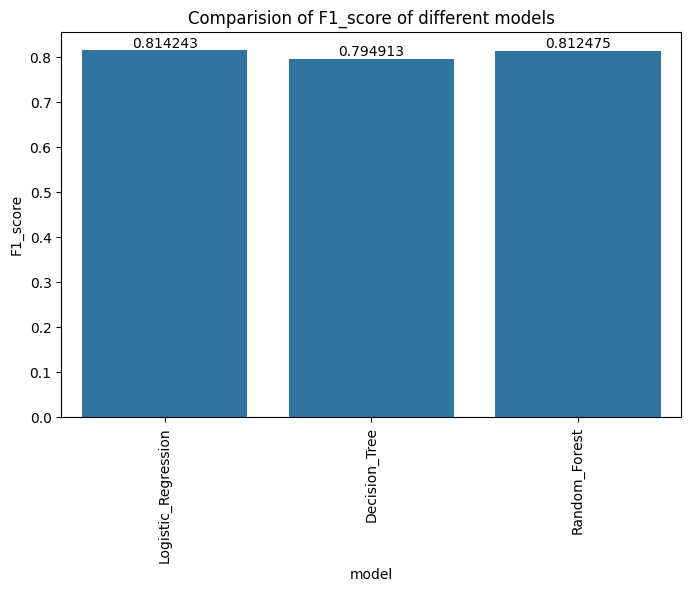

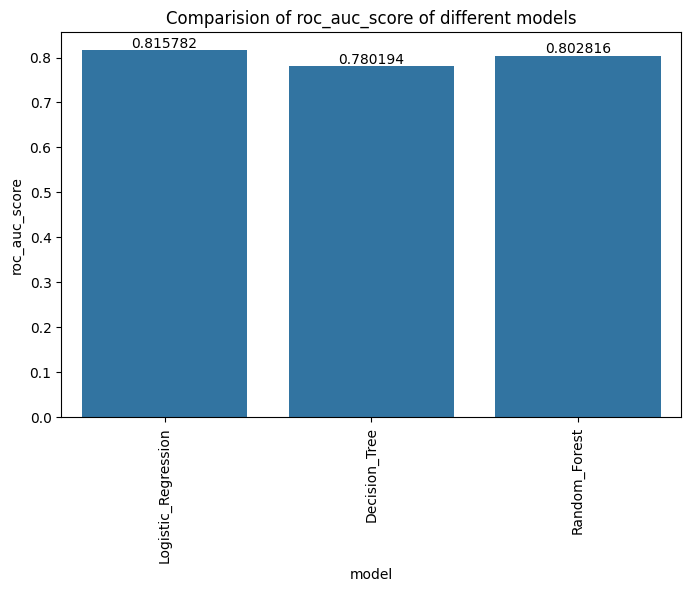

In [160]:
## Plotting bar plot to compare each evaluation metric for different models

# Defining target
col=[var for var in models_evaluation_df.columns if var not in ['model','confusion matrix']]

for var in col:
    plt.figure(figsize=(8,5))
    ax=sns.barplot(x=models_evaluation_df['model'], y=models_evaluation_df[var])
    ax.set_title(f'Comparision of {var} of different models')
    ax.bar_label(ax.containers[0])
    ax.tick_params(axis='x', rotation=90)
    plt.show()

## Model Performance Comparison

### Observations:
- **Logistic Regression** achieves a **high accuracy** of 81.57%, with a **good balance** in Precision (82.38%) and Recall (80.49%). The F1 score is 81.42%, and the ROC-AUC score is 81.58%. The confusion matrix shows some misclassifications, especially in the False Positives (203).
  
- **Decision Tree** has an **accuracy of 78.04%**, which is lower than the other two models. However, it excels in **Recall** (84.82%), indicating it does a better job of detecting positive instances. Precision is comparatively lower at 74.79%, and the ROC-AUC score is 78.02%. The confusion matrix shows it struggles with False Positives (337).

- **Random Forest** achieves an **accuracy of 80.30%**, with **Precision** (77.75%) and **Recall** (85.07%) outperforming Decision Tree in terms of balance. The **F1 score** (81.25%) and **ROC-AUC score** (80.28%) indicate a good overall model performance. The confusion matrix reveals fewer False Positives (287) compared to Decision Tree.

### Best Model:
- **Random Forest** is the best model based on **overall performance**. It provides a **good balance** between **Precision** and **Recall**, achieving an **F1 score** of 81.25% and a **ROC-AUC score** of 80.28%. Additionally, it maintains a reasonable number of False Positives, making it the most reliable model in this comparison.


In [161]:
import joblib

# Assuming 'classifier_rf' is the trained Random Forest model
# Save the model to a file
joblib.dump(classifier_rf, 'random_forest_model.pkl')

print("Best Random Forest model saved successfully!")

Best Random Forest model saved successfully!


In [174]:
import joblib

# Load the trained model
model = joblib.load('random_forest_model.pkl')

# If the model has feature_names_in_ attribute (usually from models trained with feature names)
if hasattr(model, 'feature_names_in_'):
    print("Features used by the model:", model.feature_names_in_)
else:
    print("The model does not have the 'feature_names_in_' attribute.")

# Alternatively, you can print feature importances if you're interested in which features are most important
if hasattr(model, 'feature_importances_'):
    print("Feature importances:", model.feature_importances_)


The model does not have the 'feature_names_in_' attribute.
